# Business Case - Netflix

#### 📺🎬📽️ **Netflix - Exploratory Data Analysis** 🍿👀👥
 
#### About NETFLIX
Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

## 🎯 **Business Problem & Objectives**

**Delve into Netflix's dataset to guide strategic decision-making for content production and identify business growth opportunities across 100+ countries.**

| Objective | Analysis Approach | Business Impact |
|-----------|------------------|-----------------|
| **🎬 Content Strategy** | Univariate + Bivariate analysis of movies/TV shows | Guide $17B annual content spend |
| **🌍 Market Expansion** | Country-wise genre + content type trends | Identify high-growth regions |
| **📊 Actionable Insights** | Data exploration, cleaning, transformation | Influence production + marketing |
| **🎯 Customer Impact** | Popularity patterns by genre/country | Better targeting → retention + penetration |

**Results → Optimized content strategy, enhanced customer experience, improved global market penetration.**

### Dataset Link: 
https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

| Show_id | Type | Title | Director | Cast | Country | Date_added | Release_year | Rating | Duration | Listed_in | Description |
|---------|------|-------|----------|------|---------|------------|--------------|--------|----------|-----------|-------------|
| `a1b2c3d4e5f6g7h8i9j0k1l2m3n4o5p6` | Movie/TV Show | Title of the Movie/TV Show | Director name(s) | Actor names (comma-separated) | Country of production | YYYY-MM-DD | YYYY | TV rating (PG-13, TV-MA, etc.) | Minutes or Seasons | Genre/Category | Summary description |

##### 🏷️Dataset: See the `data` subfolder

#### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Load Dataset and analyze the columns

In [3]:
#Read CSV file as dataframe
netflix_df = pd.read_csv('netflix.csv')

#print first 5 rows
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [4]:
# shape, ndim
print(netflix_df.shape)
print(netflix_df.ndim)

(8807, 12)
2


In [5]:
# Inspect columns
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
# Number of movies and TV Shows
print(netflix_df['type'].value_counts())

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [8]:
### Unnesting the director column
director_list = netflix_df['director'].apply(lambda x: str(x).split(', ')).tolist()
netflix_director_df = pd.DataFrame(director_list,index=netflix_df['title'])
netflix_director_df = netflix_director_df.stack().reset_index(name='director').drop('level_1', axis=1).set_index('title')
netflix_director_df.replace("nan", float('nan'), inplace=True)
netflix_director_df

,director
title,
Dick Johnson Is Dead,Kirsten Johnson
Blood & Water,NaN
Ganglands,Julien Leclercq
Jailbirds New Orleans,NaN
Kota Factory,NaN
...,...
Zodiac,David Fincher
Zombie Dumb,NaN
Zombieland,Ruben Fleischer


In [9]:
### Unnesting the country column
country_list = netflix_df['country'].apply(lambda x: str(x).split(', ')).to_list()
netflix_country_df = pd.DataFrame(country_list, index=netflix_df['title'])
netflix_country_df = netflix_country_df.stack().reset_index(name='country').drop('level_1', axis=1).set_index('title')
netflix_country_df.replace("nan", float('nan'), inplace=True)
netflix_country_df

,country
title,
Dick Johnson Is Dead,United States
Blood & Water,South Africa
Ganglands,NaN
Jailbirds New Orleans,NaN
Kota Factory,India
...,...
Zodiac,United States
Zombie Dumb,NaN
Zombieland,United States


In [10]:
### Unnesting the listed_in column
listdin_list = netflix_df['listed_in'].apply(lambda x: str(x).split(', ')).to_list()
netflix_listdin_list_df = pd.DataFrame(listdin_list, index=netflix_df['title'])
netflix_listdin_list_df = netflix_listdin_list_df.stack().reset_index(name='listed_in').drop('level_1', axis=1).set_index('title')
netflix_listdin_list_df.replace("nan", float('nan'), inplace=True)
netflix_listdin_list_df

,listed_in
title,
Dick Johnson Is Dead,Documentaries
Blood & Water,International TV Shows
Blood & Water,TV Dramas
Blood & Water,TV Mysteries
Ganglands,Crime TV Shows
...,...
Zoom,Children & Family Movies
Zoom,Comedies
Zubaan,Dramas


In [11]:
### Unnesting the cast column
cast_list = netflix_df['cast'].apply(lambda x: str(x).split(', ')).to_list()
netflix_cast_df = pd.DataFrame(cast_list, index=netflix_df['title'])
netflix_cast_df = netflix_cast_df.stack().reset_index(name='cast').drop('level_1', axis=1).set_index('title')
netflix_cast_df.replace("nan", float('nan'), inplace=True)
netflix_cast_df

,cast
title,
Dick Johnson Is Dead,NaN
Blood & Water,Ama Qamata
Blood & Water,Khosi Ngema
Blood & Water,Gail Mabalane
Blood & Water,Thabang Molaba
...,...
Zubaan,Manish Chaudhary
Zubaan,Meghna Malik
Zubaan,Malkeet Rauni


In [12]:
netflix_cast_df.isna().sum()

cast    825
dtype: int64

In [13]:
#df_merged = netflix_cast_df.merge(netflix_listdin_list_df , on='title', how='inner')

In [14]:
# Step 1: Start with cast (most values)
df_merged = netflix_cast_df.merge(netflix_listdin_list_df, on='title', how='inner')

# Step 2: Add directors  
df_merged2 = df_merged.merge(netflix_director_df, on='title', how='inner')

# Step 3: Add countries
df_final_unnested = df_merged2.merge(netflix_country_df, on='title', how='inner')

# Step 4: Reset index + merge original (get show_id, type, etc.)
df_final_unnested = df_final_unnested.reset_index()
df_final = df_final_unnested.merge(
    netflix_df[['show_id', 'type', 'title', 'date_added', 'release_year', 'rating', 'duration']], 
    on='title', how='left'
)

In [19]:
df_final.head()

,title,cast,listed_in,director,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,NaN,Documentaries,Kirsten Johnson,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,International TV Shows,NaN,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,TV Dramas,NaN,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,TV Mysteries,NaN,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,International TV Shows,NaN,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [15]:
#df_merged.shape

(149512, 2)

In [36]:
#df_merged2 = df_merged.merge(netflix_country_df , on='title', how='inner')

In [16]:
#df_merged2.shape

(161216, 3)

In [38]:
#df_merged3 = df_merged.merge(netflix_director_df , on='title', how='inner')

In [18]:
#df_merged3.shape

In [21]:
#merging our unnested data with the original data
#df_final = df_merged3.merge(netflix_df[['show_id', 'type', 'title', 'date_added',
#       'release_year', 'rating', 'duration']],on=['title'],how='left')
#df_final.head()

In [22]:
df_final.shape

(201991, 11)

In [23]:
df_final.isnull().sum()

title               0
cast             2146
listed_in           0
director        50643
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            3
dtype: int64

In [24]:
# Count by different rating
df_final['rating'].value_counts()

rating
TV-MA       73867
TV-14       43931
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1573
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
74 min          1
84 min          1
66 min          1
Name: count, dtype: int64

#### Lets deal with incorrect values in rating col

In [25]:
### Identify the incorrect rating rows
mask = df_final['rating'].isin(["74 min", "84 min", "66 min"])
df_final[mask]

,title,cast,listed_in,director,country,show_id,type,date_added,release_year,rating,duration
126537,Louis C.K. 2017,Louis C.K.,Movies,Louis C.K.,United States,s5542,Movie,"April 4, 2017",2017,74 min,NaN
131603,Louis C.K.: Hilarious,Louis C.K.,Movies,Louis C.K.,United States,s5795,Movie,"September 16, 2016",2010,84 min,NaN
131737,Louis C.K.: Live at the Comedy Store,Louis C.K.,Movies,Louis C.K.,United States,s5814,Movie,"August 15, 2016",2015,66 min,NaN


In [26]:
### Looks like swapped entries. So lets replace it properly
### We get the values from rating col and put that in duration col
df_final.loc[mask, "duration"] = df_final.loc[mask, "rating"]
df_final[mask]

,title,cast,listed_in,director,country,show_id,type,date_added,release_year,rating,duration
126537,Louis C.K. 2017,Louis C.K.,Movies,Louis C.K.,United States,s5542,Movie,"April 4, 2017",2017,74 min,74 min
131603,Louis C.K.: Hilarious,Louis C.K.,Movies,Louis C.K.,United States,s5795,Movie,"September 16, 2016",2010,84 min,84 min
131737,Louis C.K.: Live at the Comedy Store,Louis C.K.,Movies,Louis C.K.,United States,s5814,Movie,"August 15, 2016",2015,66 min,66 min


In [27]:
#Lets replace the rating col that contains min with NR
df_final.loc[df_final['rating'].str.contains('min', na=False),'rating']='NR'
df_final.isnull().sum()

title               0
cast             2146
listed_in           0
director        50643
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            0
dtype: int64

#### Good we have fixed the incorrect values in rating col

#### Lets now fill rating nulls with NR

In [28]:
# fill missing ratings with NR
df_final['rating'].fillna('NR',inplace=True)

/var/folders/l2/2z44g3090wbd6sc3nb91dh8c0000gn/T/ipykernel_1178/2513427899.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['rating'].fillna('NR',inplace=True)


In [29]:
#df_final.loc[df_final['rating'].isna()]

In [30]:
df_final.isnull().sum()

title               0
cast             2146
listed_in           0
director        50643
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating              0
duration            0
dtype: int64

In [31]:
#just an attempt to observe nulls in date_added column
df_final[df_final['date_added'].isnull()]

,title,cast,listed_in,director,country,show_id,type,date_added,release_year,rating,duration
136893,A Young Doctor's Notebook and Other Stories,Daniel Radcliffe,British TV Shows,NaN,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136894,A Young Doctor's Notebook and Other Stories,Daniel Radcliffe,TV Comedies,NaN,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136895,A Young Doctor's Notebook and Other Stories,Daniel Radcliffe,TV Dramas,NaN,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136896,A Young Doctor's Notebook and Other Stories,Jon Hamm,British TV Shows,NaN,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136897,A Young Doctor's Notebook and Other Stories,Jon Hamm,TV Comedies,NaN,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
186891,The Adventures of Figaro Pho,Charlotte Hamlyn,TV Comedies,NaN,Australia,s8183,TV Show,NaN,2015,TV-Y7,2 Seasons
186892,The Adventures of Figaro Pho,Stavroula Mountzouris,Kids' TV,NaN,Australia,s8183,TV Show,NaN,2015,TV-Y7,2 Seasons
186893,The Adventures of Figaro Pho,Stavroula Mountzouris,TV Comedies,NaN,Australia,s8183,TV Show,NaN,2015,TV-Y7,2 Seasons
186894,The Adventures of Figaro Pho,Aletheia Burney,Kids' TV,NaN,Australia,s8183,TV Show,NaN,2015,TV-Y7,2 Seasons


#### How to fill the date added null values?
##### We will find the release_year, country, type and use mode of it to fill the missing date_added
#####  Eg: s8183, Australia, 2015 should be imputed with June 30, 2015

In [35]:
# Enhanced loop with fallback logic for missing country
for i in df_final[df_final['date_added'].isnull()][['release_year', 'country', 'type']].drop_duplicates().itertuples(index=False):
    
    # Primary: Try exact match (year + country + type)
    mask_primary = (
        (df_final['release_year'] == i.release_year) & 
        (df_final['country'] == i.country) & 
        (df_final['type'] == i.type)
    )
    
    # Fallback: If country is NaN, use (year + type) only
    if pd.isna(i.country):
        mask_fallback = (
            (df_final['release_year'] == i.release_year) & 
            (df_final['type'] == i.type)
        )
        mode_date = df_final.loc[mask_fallback, 'date_added'].mode()
    else:
        mode_date = df_final.loc[mask_primary, 'date_added'].mode()
    
    # Fill nulls with mode value
    if len(mode_date) > 0:
        fill_mask = mask_primary if not pd.isna(i.country) else mask_fallback
        df_final.loc[fill_mask & df_final['date_added'].isnull(), 'date_added'] = mode_date.iloc[0]

In [36]:
df_final[df_final['date_added'].isnull()]

,title,cast,listed_in,director,country,show_id,type,date_added,release_year,rating,duration


In [37]:
df_final.isnull().sum()

title               0
cast             2146
listed_in           0
director        50643
country         11897
show_id             0
type                0
date_added          0
release_year        0
rating              0
duration            0
dtype: int64

In [38]:
df_final[ (df_final['type']=='TV Show') & (df_final['country'].isnull() ) & (df_final['release_year'] == 2010)]['date_added'].mode()

0    August 1, 2021
Name: date_added, dtype: object

#### How to fill the country null values?
##### We will find the director, cast, type and use mode of it to fill the missing country
#####  Eg: s1001, Ahishor Solomon, Movie should be imputed with India

In [39]:
df_final[df_final['country'].isnull()]

,title,cast,listed_in,director,country,show_id,type,date_added,release_year,rating,duration
58,Ganglands,Sami Bouajila,Crime TV Shows,Julien Leclercq,NaN,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season
59,Ganglands,Sami Bouajila,International TV Shows,Julien Leclercq,NaN,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season
60,Ganglands,Sami Bouajila,TV Action & Adventure,Julien Leclercq,NaN,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season
61,Ganglands,Tracy Gotoas,Crime TV Shows,Julien Leclercq,NaN,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season
62,Ganglands,Tracy Gotoas,International TV Shows,Julien Leclercq,NaN,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season
...,...,...,...,...,...,...,...,...,...,...,...
201424,YOM,Mayur Vyas,Kids' TV,NaN,NaN,s8786,TV Show,"June 7, 2018",2016,TV-Y7,1 Season
201425,YOM,Ketan Kava,Kids' TV,NaN,NaN,s8786,TV Show,"June 7, 2018",2016,TV-Y7,1 Season
201932,Zombie Dumb,NaN,Kids' TV,NaN,NaN,s8804,TV Show,"July 1, 2019",2018,TV-Y7,2 Seasons
201933,Zombie Dumb,NaN,Korean TV Shows,NaN,NaN,s8804,TV Show,"July 1, 2019",2018,TV-Y7,2 Seasons


In [40]:
#2: Context-aware cascade (most specific → general)
#Step 1: Same director + same type → country  
#Step 2: Same cast member + same type → country  
#Step 3: Same type only → country  
#Step 4: "Unknown"

# Progressive fallback: director,type → cast,type → type only
mask_country_null = df_final['country'].isnull()

# Step 1: Try (director, type)
mask1 = mask_country_null & df_final['director'].notnull()
for i in df_final[mask1][['director', 'type']].drop_duplicates().itertuples(index=False):
    m = ((df_final['director'] == i.director) & (df_final['type'] == i.type))
    mode_c = df_final.loc[m, 'country'].mode()
    if len(mode_c) > 0:
        df_final.loc[m & mask_country_null, 'country'] = mode_c.iloc[0]

# Step 2: Try (cast, type) if still null
mask_country_null = df_final['country'].isnull()  # Update mask
mask2 = mask_country_null & df_final['cast'].notnull()
for i in df_final[mask2][['cast', 'type']].drop_duplicates().itertuples(index=False):
    m = ((df_final['cast'].str.contains(i.cast, na=False)) & (df_final['type'] == i.type))
    mode_c = df_final.loc[m, 'country'].mode()
    if len(mode_c) > 0:
        df_final.loc[m & mask_country_null, 'country'] = mode_c.iloc[0]

# Step 3: Final fallback (type only)
mask_country_null = df_final['country'].isnull()
for i in df_final[mask_country_null]['type'].unique():
    m = (df_final['type'] == i)
    mode_c = df_final.loc[m, 'country'].mode()
    if len(mode_c) > 0:
        df_final.loc[m & mask_country_null, 'country'] = mode_c.iloc[0]

# Final catch-all
df_final['country'] = df_final['country'].fillna('Unknown')

/var/folders/l2/2z44g3090wbd6sc3nb91dh8c0000gn/T/ipykernel_1178/1706800253.py:16: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  m = ((df_final['cast'].str.contains(i.cast, na=False)) & (df_final['type'] == i.type))


In [41]:
df_final[df_final['country'].isnull()]

,title,cast,listed_in,director,country,show_id,type,date_added,release_year,rating,duration


In [42]:
df_final.isna().sum()

title               0
cast             2146
listed_in           0
director        50643
country             0
show_id             0
type                0
date_added          0
release_year        0
rating              0
duration            0
dtype: int64

In [43]:
df_final[df_final['cast'].isnull()]

,title,cast,listed_in,director,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,NaN,Documentaries,Kirsten Johnson,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
85,Jailbirds New Orleans,NaN,Docuseries,NaN,United States,s4,TV Show,"September 24, 2021",2021,TV-MA,1 Season
86,Jailbirds New Orleans,NaN,Reality TV,NaN,United States,s4,TV Show,"September 24, 2021",2021,TV-MA,1 Season
353,"Vendetta: Truth, Lies and The Mafia",NaN,Crime TV Shows,NaN,United States,s11,TV Show,"September 24, 2021",2021,TV-MA,1 Season
354,"Vendetta: Truth, Lies and The Mafia",NaN,Docuseries,NaN,United States,s11,TV Show,"September 24, 2021",2021,TV-MA,1 Season
...,...,...,...,...,...,...,...,...,...,...,...
200705,Woodstock,NaN,Music & Musicals,Barak Goodman,United States,s8757,Movie,"August 13, 2019",2019,TV-MA,97 min
200824,WWII: Report from the Aleutians,NaN,Documentaries,John Huston,United States,s8764,Movie,"March 31, 2017",1943,TV-PG,45 min
201932,Zombie Dumb,NaN,Kids' TV,NaN,United States,s8804,TV Show,"July 1, 2019",2018,TV-Y7,2 Seasons
201933,Zombie Dumb,NaN,Korean TV Shows,NaN,United States,s8804,TV Show,"July 1, 2019",2018,TV-Y7,2 Seasons


In [44]:
# Chain fillna: cast → director → 'Unknown'
df_final['cast'] = df_final['cast'].fillna(df_final['director']).fillna('Unknown Cast')

In [45]:
df_final.isna().sum()

title               0
cast                0
listed_in           0
director        50643
country             0
show_id             0
type                0
date_added          0
release_year        0
rating              0
duration            0
dtype: int64

In [46]:
df_final[ (df_final['show_id']=='s102')]

,title,cast,listed_in,director,country,show_id,type,date_added,release_year,rating,duration
2270,Untold: Breaking Point,Chapman Way,Documentaries,Chapman Way,United States,s102,Movie,"September 7, 2021",2021,TV-MA,80 min
2271,Untold: Breaking Point,Maclain Way,Documentaries,Maclain Way,United States,s102,Movie,"September 7, 2021",2021,TV-MA,80 min
2272,Untold: Breaking Point,Chapman Way,Sports Movies,Chapman Way,United States,s102,Movie,"September 7, 2021",2021,TV-MA,80 min
2273,Untold: Breaking Point,Maclain Way,Sports Movies,Maclain Way,United States,s102,Movie,"September 7, 2021",2021,TV-MA,80 min


In [47]:
# Fill director nulls with progressive fallback logic

mask_dir_null = df_final['director'].isnull()

# Step 1: Try (cast, country, type) mode
mask1 = mask_dir_null & df_final['cast'].notnull()
for i in df_final[mask1][['cast', 'country', 'type']].drop_duplicates().itertuples(index=False):
    m = (
        (df_final['cast'].str.contains(i.cast, na=False)) & 
        (df_final['country'] == i.country) & 
        (df_final['type'] == i.type)
    )
    mode_dir = df_final.loc[m, 'director'].mode()
    if len(mode_dir) > 0:
        df_final.loc[m & mask_dir_null, 'director'] = mode_dir.iloc[0]

# Step 2: Fallback (type, country) 
mask_dir_null = df_final['director'].isnull()  # Update mask
mask2 = mask_dir_null & df_final['country'].notnull()
for i in df_final[mask2][['type', 'country']].drop_duplicates().itertuples(index=False):
    m = (
        (df_final['type'] == i.type) & 
        (df_final['country'] == i.country)
    )
    mode_dir = df_final.loc[m, 'director'].mode()
    if len(mode_dir) > 0:
        df_final.loc[m & mask_dir_null, 'director'] = mode_dir.iloc[0]

# Step 3: Final fallback (type only)
mask_dir_null = df_final['director'].isnull()
for i in df_final[mask_dir_null]['type'].unique():
    m = (df_final['type'] == i)
    mode_dir = df_final.loc[m, 'director'].mode()
    if len(mode_dir) > 0:
        df_final.loc[m & mask_dir_null, 'director'] = mode_dir.iloc[0]

# Ultimate fallback
df_final['director'] = df_final['director'].fillna('Unknown Director')

/var/folders/l2/2z44g3090wbd6sc3nb91dh8c0000gn/T/ipykernel_1178/2718454969.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (df_final['cast'].str.contains(i.cast, na=False)) &
/var/folders/l2/2z44g3090wbd6sc3nb91dh8c0000gn/T/ipykernel_1178/2718454969.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (df_final['cast'].str.contains(i.cast, na=False)) &


In [48]:
df_final.isna().sum()

title           0
cast            0
listed_in       0
director        0
country         0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

In [49]:
df_final['duration'].value_counts()

duration
1 Season     35035
2 Seasons     9559
3 Seasons     5084
94 min        4343
106 min       4040
             ...  
3 min            4
5 min            3
11 min           2
8 min            2
9 min            2
Name: count, Length: 220, dtype: int64

In [50]:
#removing mins from data
df_final['duration']=df_final['duration'].str.replace(" min","")
df_final.head()

,title,cast,listed_in,director,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Documentaries,Kirsten Johnson,United States,s1,Movie,"September 25, 2021",2020,PG-13,90
1,Blood & Water,Ama Qamata,International TV Shows,Cecilia Peck,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,TV Dramas,Cecilia Peck,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,TV Mysteries,Cecilia Peck,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,International TV Shows,Cecilia Peck,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [51]:
df_final['duration'].unique()

array(['90', '2 Seasons', '1 Season', '91', '125', '9 Seasons', '104',
       '127', '4 Seasons', '67', '94', '5 Seasons', '161', '61', '166',
       '147', '103', '97', '106', '111', '3 Seasons', '110', '105', '96',
       '124', '116', '98', '23', '115', '122', '99', '88', '100',
       '6 Seasons', '102', '93', '95', '85', '83', '113', '13', '182',
       '48', '145', '87', '92', '80', '117', '128', '119', '143', '114',
       '118', '108', '63', '121', '142', '154', '120', '82', '109', '101',
       '86', '229', '76', '89', '156', '112', '107', '129', '135', '136',
       '165', '150', '133', '70', '84', '140', '78', '7 Seasons', '64',
       '59', '139', '69', '148', '189', '141', '130', '138', '81', '132',
       '10 Seasons', '123', '65', '68', '66', '62', '74', '131', '39',
       '46', '38', '8 Seasons', '17 Seasons', '126', '155', '159', '137',
       '12', '273', '36', '34', '77', '60', '49', '58', '72', '204',
       '212', '25', '73', '29', '47', '32', '35', '71', '149', '

In [52]:
df_final['duration_copy']=df_final['duration'].copy()
df_final1=df_final.copy()

In [53]:
# Extract numbers OR handle Seasons/NaN
df_final1['duration_copy'] = df_final1['duration_copy'].fillna('0 min')

# Replace Seasons with 0
df_final1.loc[df_final1['duration_copy'].str.contains('Season', na=False), 'duration_copy'] = 0

# Extract numeric part and convert
df_final1['duration_copy'] = df_final1['duration_copy'].str.extract('(\d+)').fillna(0).astype('int')

df_final1.head()

<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
/var/folders/l2/2z44g3090wbd6sc3nb91dh8c0000gn/T/ipykernel_1178/170851927.py:8: SyntaxWarning: invalid escape sequence '\d'
  df_final1['duration_copy'] = df_final1['duration_copy'].str.extract('(\d+)').fillna(0).astype('int')


,title,cast,listed_in,director,country,show_id,type,date_added,release_year,rating,duration,duration_copy
0,Dick Johnson Is Dead,Kirsten Johnson,Documentaries,Kirsten Johnson,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,90
1,Blood & Water,Ama Qamata,International TV Shows,Cecilia Peck,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
2,Blood & Water,Ama Qamata,TV Dramas,Cecilia Peck,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
3,Blood & Water,Ama Qamata,TV Mysteries,Cecilia Peck,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
4,Blood & Water,Khosi Ngema,International TV Shows,Cecilia Peck,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0


In [54]:
df_final1['duration_copy'].describe()

count    201991.000000
mean         77.152789
std          52.269154
min           0.000000
25%           0.000000
50%          95.000000
75%         112.000000
max         312.000000
Name: duration_copy, dtype: float64

/var/folders/l2/2z44g3090wbd6sc3nb91dh8c0000gn/T/ipykernel_1178/2955777942.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final1['duration_copy'], hist=True, kde=True,


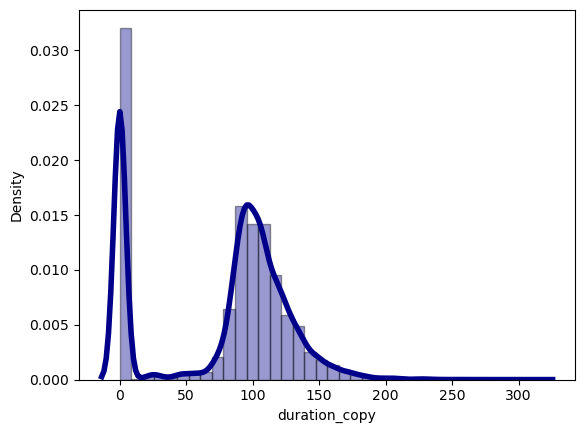

In [55]:
import seaborn as sns
sns.distplot(df_final1['duration_copy'], hist=True, kde=True,
bins=int(36), color = 'darkblue',
hist_kws={'edgecolor':'black'},
kde_kws={'linewidth': 4})
plt.show()

In [56]:
bins1 = [-1,1,50,80,100,120,150,200,315]
labels1 = ['<1','1-50','50-80','80-100','100-120','120-150','150-200','200-315']
df_final1['duration_copy'] = pd.cut(df_final1['duration_copy'],bins=bins1,labels=labels1)
df_final1.head()

,title,cast,listed_in,director,country,show_id,type,date_added,release_year,rating,duration,duration_copy
0,Dick Johnson Is Dead,Kirsten Johnson,Documentaries,Kirsten Johnson,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,80-100
1,Blood & Water,Ama Qamata,International TV Shows,Cecilia Peck,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
2,Blood & Water,Ama Qamata,TV Dramas,Cecilia Peck,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
3,Blood & Water,Ama Qamata,TV Mysteries,Cecilia Peck,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
4,Blood & Water,Khosi Ngema,International TV Shows,Cecilia Peck,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1


In [57]:
# Step 1: Fill NaN values to make it string-compatible
df_final1['duration'] = df_final1['duration'].fillna('0 min')

# Step 2: NOW apply your logic safely
df_final1.loc[~df_final1['duration'].str.contains('Season', na=False), 'duration'] = \
    df_final1.loc[~df_final1['duration'].str.contains('Season', na=False), 'duration_copy']

df_final1.head()

,title,cast,listed_in,director,country,show_id,type,date_added,release_year,rating,duration,duration_copy
0,Dick Johnson Is Dead,Kirsten Johnson,Documentaries,Kirsten Johnson,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100,80-100
1,Blood & Water,Ama Qamata,International TV Shows,Cecilia Peck,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
2,Blood & Water,Ama Qamata,TV Dramas,Cecilia Peck,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
3,Blood & Water,Ama Qamata,TV Mysteries,Cecilia Peck,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
4,Blood & Water,Khosi Ngema,International TV Shows,Cecilia Peck,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1


In [58]:
df_final1.isna().sum()

title            0
cast             0
listed_in        0
director         0
country          0
show_id          0
type             0
date_added       0
release_year     0
rating           0
duration         0
duration_copy    0
dtype: int64

In [59]:
df_final1['duration'].value_counts()

duration
80-100        52937
100-120       48724
1 Season      35035
120-150       26691
2 Seasons      9559
50-80          7700
150-200        6737
3 Seasons      5084
1-50           2530
4 Seasons      2134
5 Seasons      1698
7 Seasons       843
6 Seasons       633
200-315         524
8 Seasons       286
9 Seasons       257
10 Seasons      220
13 Seasons      132
12 Seasons      111
15 Seasons       96
17 Seasons       30
11 Seasons       30
Name: count, dtype: int64

In [60]:
#from datetime import datetime
#from dateutil.parser import parse
#arr=[]
#for i in df_final1['date_added'].dropna():
#    dt1=parse(i)
#    arr.append(dt1.strftime('%Y-%m-%d'))
#df_final1['Modified_Added_date'] =arr
##df_final1['Modified_Added_date']=pd.to_datetime(df_final1['Modified_Added_date'])
#df_final1['month_added']=df_final1['Modified_Added_date'].dt.month
#df_final1['week_Added']=df_final1['Modified_Added_date'].dt.week
#df_final1['year']=df_final1['Modified_Added_date'].dt.year
#df_final1.head()

In [61]:
# Single line - handles NaN automatically
df_final1['Modified_Added_date'] = pd.to_datetime(df_final1['date_added'], errors='coerce', infer_datetime_format=True)

# Extract components
df_final1['month_added'] = df_final1['Modified_Added_date'].dt.month
df_final1['week_Added'] = df_final1['Modified_Added_date'].dt.isocalendar().week
df_final1['year'] = df_final1['Modified_Added_date'].dt.year

df_final1.head()


/var/folders/l2/2z44g3090wbd6sc3nb91dh8c0000gn/T/ipykernel_1178/4249729472.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_final1['Modified_Added_date'] = pd.to_datetime(df_final1['date_added'], errors='coerce', infer_datetime_format=True)


,title,cast,listed_in,director,country,show_id,type,date_added,release_year,rating,duration,duration_copy,Modified_Added_date,month_added,week_Added,year
0,Dick Johnson Is Dead,Kirsten Johnson,Documentaries,Kirsten Johnson,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100,80-100,2021-09-25,9.0,38,2021.0
1,Blood & Water,Ama Qamata,International TV Shows,Cecilia Peck,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1,2021-09-24,9.0,38,2021.0
2,Blood & Water,Ama Qamata,TV Dramas,Cecilia Peck,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1,2021-09-24,9.0,38,2021.0
3,Blood & Water,Ama Qamata,TV Mysteries,Cecilia Peck,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1,2021-09-24,9.0,38,2021.0
4,Blood & Water,Khosi Ngema,International TV Shows,Cecilia Peck,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1,2021-09-24,9.0,38,2021.0


#### Univariate Analysis

In [62]:
#number of distinct titles on the basis of genre
df_final1.groupby(['listed_in']).agg({"title":"nunique"})

,title
listed_in,
Action & Adventure,859
Anime Features,71
Anime Series,176
British TV Shows,253
Children & Family Movies,641
Classic & Cult TV,28
Classic Movies,116
Comedies,1674
Crime TV Shows,470


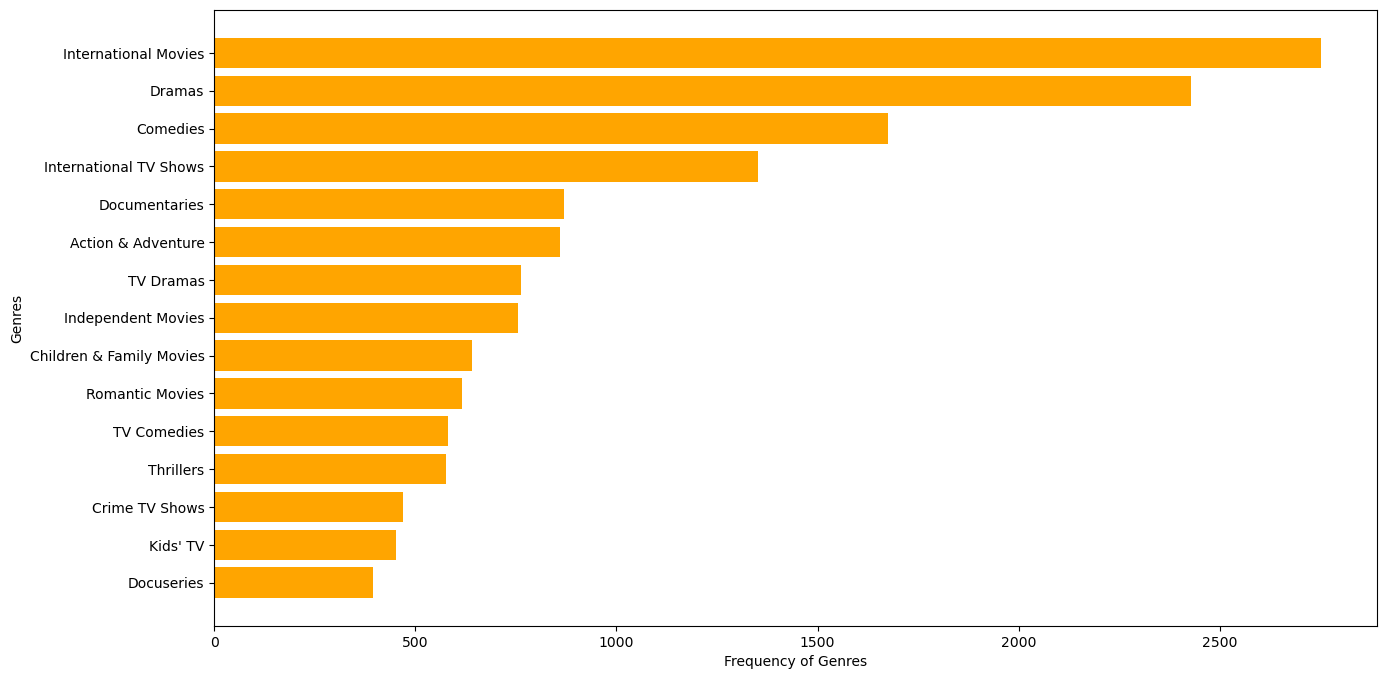

In [63]:
df_genre=df_final1.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['listed_in'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

##### Insights
1. International Movies, Dramas and Comedies are the most popular .

In [59]:
#number of distinct titles on the basis of type
df_final1.groupby(['type']).agg({"title":"nunique"})

,title
type,
Movie,6131
TV Show,2676


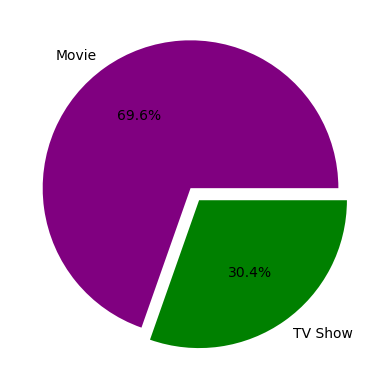

In [60]:
 df_type=df_final1.groupby(['type']).agg({"title":"nunique"}).reset_index()
 plt.pie(df_type['title'],explode=(0.05,0.05), labels=df_type['type'],colors=['purple','green'],autopct='%.1f%%')
 plt.show()

##### Insights
1. We have 70% Movies 30% TV shows

In [64]:
#number of distinct titles on the basis of country
df_final1.groupby(['country']).agg({"title":"nunique"})

,title
country,
,3
Afghanistan,1
Albania,1
Algeria,3
Angola,2
...,...
Vatican City,1
Venezuela,4
Vietnam,7


In [65]:
df_final1['country'] = df_final1['country'].str.replace(',', '')
df_final1.head()

,title,cast,listed_in,director,country,show_id,type,date_added,release_year,rating,duration,duration_copy,Modified_Added_date,month_added,week_Added,year
0,Dick Johnson Is Dead,Kirsten Johnson,Documentaries,Kirsten Johnson,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100,80-100,2021-09-25,9.0,38,2021.0
1,Blood & Water,Ama Qamata,International TV Shows,Cecilia Peck,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1,2021-09-24,9.0,38,2021.0
2,Blood & Water,Ama Qamata,TV Dramas,Cecilia Peck,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1,2021-09-24,9.0,38,2021.0
3,Blood & Water,Ama Qamata,TV Mysteries,Cecilia Peck,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1,2021-09-24,9.0,38,2021.0
4,Blood & Water,Khosi Ngema,International TV Shows,Cecilia Peck,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1,2021-09-24,9.0,38,2021.0


In [66]:
#number of distinct titles on the basis of country
df_final1.groupby(['country']).agg({"title":"nunique"})

,title
country,
,3
Afghanistan,1
Albania,1
Algeria,3
Angola,2
...,...
Vatican City,1
Venezuela,4
Vietnam,7


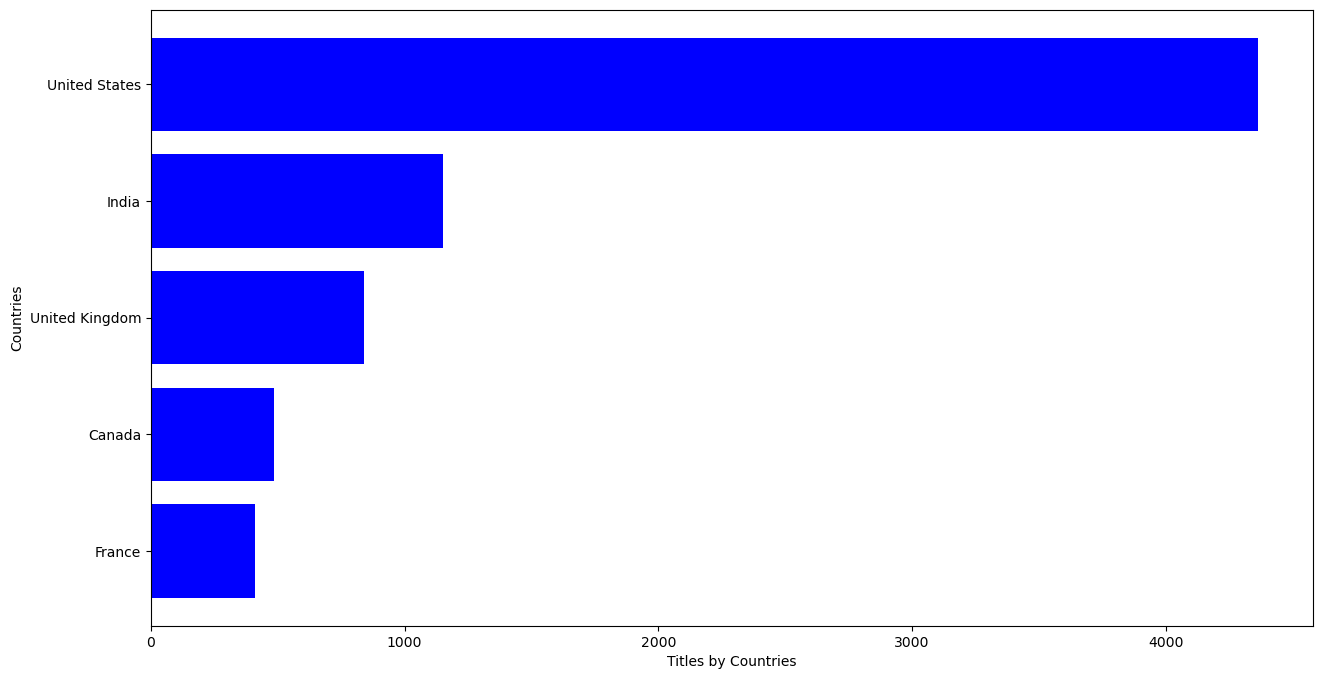

In [67]:
df_country=df_final1.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:5]
plt.figure(figsize=(15,8))
plt.barh(df_country[::-1]['country'], df_country[::-1]['title'],color=['blue'])
plt.xlabel('Titles by Countries')
plt.ylabel('Countries')
plt.show()

##### Insights
1. US, India, UK, Canada and France are leading countries on Netflix

In [68]:
#number of distinct titles on the basis of rating
df_final1.groupby(['rating']).agg({"title":"nunique"})

,title
rating,
G,41
NC-17,3
NR,87
PG,287
PG-13,490
R,799
TV-14,2160
TV-G,220
TV-MA,3207


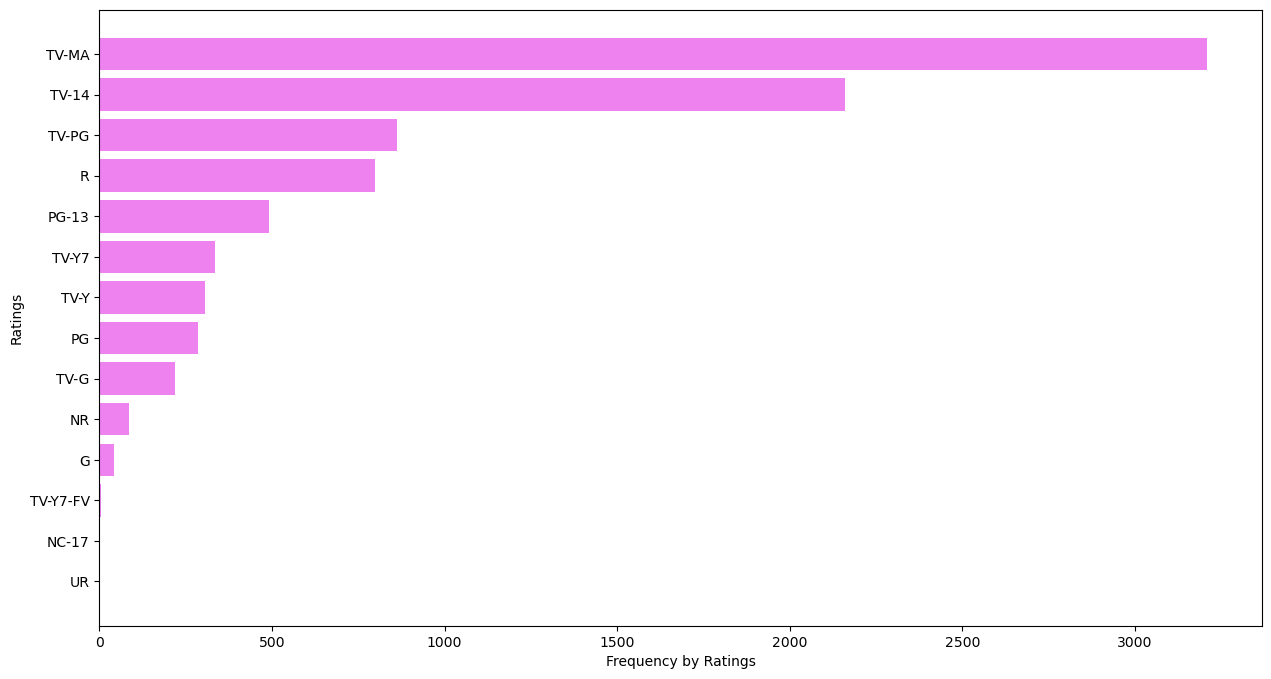

In [69]:
df_rating=df_final1.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

##### Insights
1. Most of the highly rated content are for Mature audience, R Rated and under 14.

In [70]:
#number of distinct titles on the basis of duration
df_final1.groupby(['duration']).agg({"title":"nunique"})

,title
duration,
1 Season,1793
1-50,287
10 Seasons,7
100-120,1672
11 Seasons,2
12 Seasons,2
120-150,897
13 Seasons,3
15 Seasons,2


##### Insights
1. Most watched content are between 80-100 min.

In [73]:
#number of distinct titles on the basis of Actors
df_final1.groupby(['cast']).agg({"title":"nunique"})

,title
cast,
Jr.,2
"""Riley"" Lakdhar Dridi",1
'Najite Dede,2
2 Chainz,1
2Mex,1
...,...
Şevket Çoruh,1
Şinasi Yurtsever,3
Şükran Ovalı,1


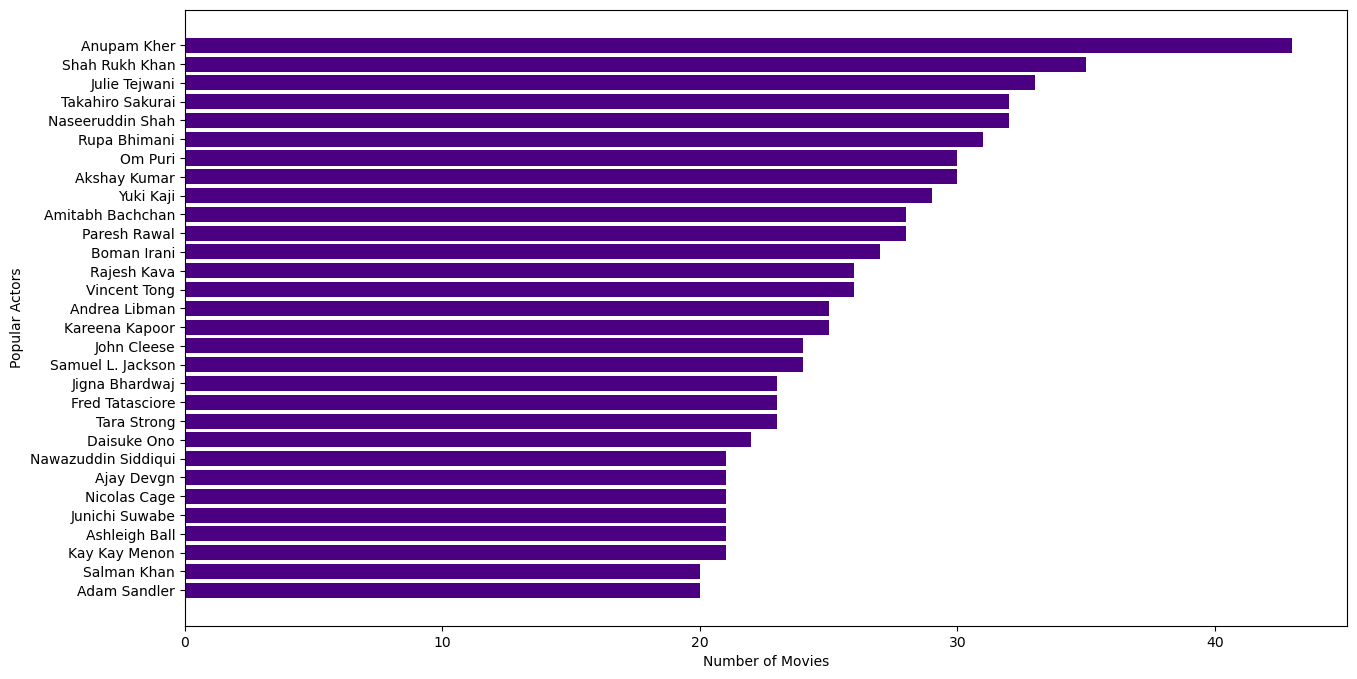

In [74]:
df_actors=df_final1.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_actors=df_actors[df_actors['cast']!='Unknown Cast']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

##### Insights
1. Most popular actors are: Anupam Kher, SRK, Julie Tejwani, Naseerudin

In [75]:
#number of distinct titles on the basis of Actors
df_final1.groupby(['director']).agg({"title":"nunique"})

,title
director,
A. L. Vijay,2
A. Raajdheep,1
A. Salaam,1
A.R. Murugadoss,2
Aadish Keluskar,1
...,...
Éric Warin,1
Ísold Uggadóttir,1
Óskar Thór Axelsson,1


In [76]:
#number of distinct titles on the basis of year
df_final1.groupby(['year']).agg({"title":"nunique"})

,title
year,
2008.0,2
2009.0,2
2010.0,1
2011.0,13
2012.0,3
2013.0,10
2014.0,23
2015.0,73
2016.0,421


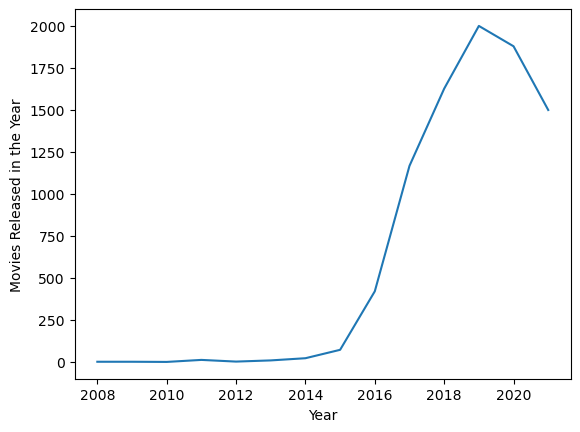

In [77]:
df_year=df_final1.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

##### Insights
1. Most of content added were during 2015 to 2019 and later started to decrease due to COVID.

In [78]:
#number of distinct titles on the basis of week
df_final1.groupby(['week_Added']).agg({"title":"nunique"})

,title
week_Added,
1,368
2,104
3,112
4,87
5,203
6,97
7,147
8,110
9,253


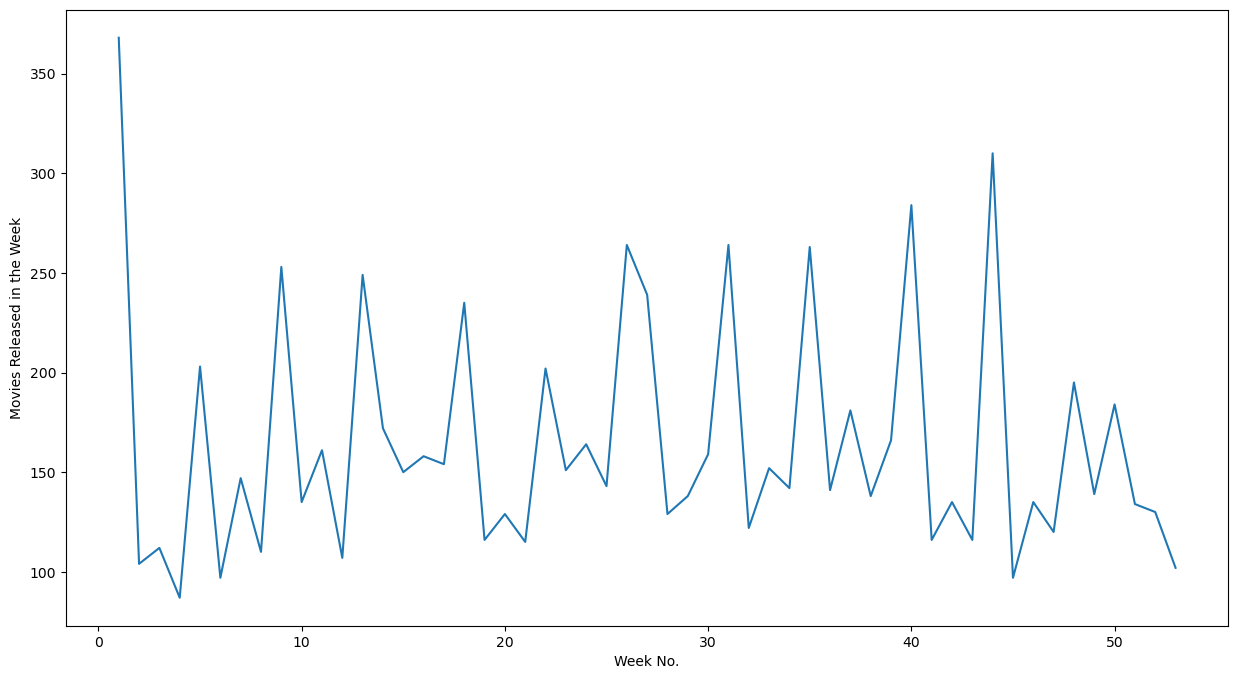

In [79]:
df_week=df_final1.groupby(['week_Added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week_Added', y='title')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

##### Insights
1. Most of content is added in 1st of year and follows a cyclical pattern.

In [80]:
#number of distinct titles on the basis of week
df_final1.groupby(['month_added']).agg({"title":"nunique"})

,title
month_added,
1.0,727
2.0,558
3.0,735
4.0,760
5.0,628
6.0,724
7.0,819
8.0,749
9.0,766


In [81]:
#number of distinct titles on the basis of week
df_final1.groupby(['month_added']).agg({"title":"nunique"})

,title
month_added,
1.0,727
2.0,558
3.0,735
4.0,760
5.0,628
6.0,724
7.0,819
8.0,749
9.0,766


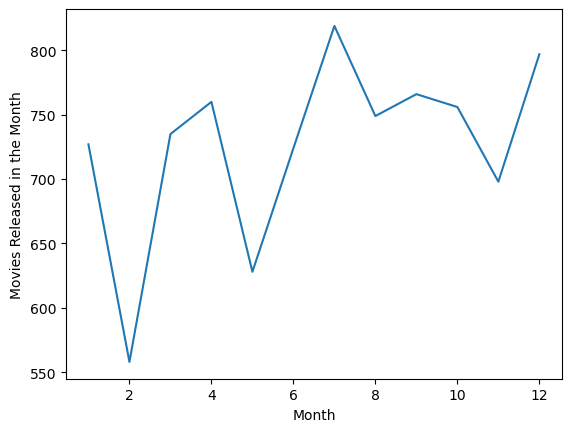

In [82]:
df_month=df_final1.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()

#### Insights
1. Most content is added in 1st month and last months.

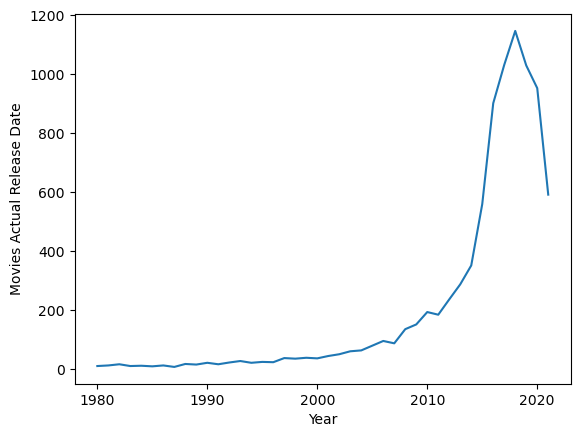

In [83]:
df_release_year=df_final1[df_final1['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

#### We now split the dataset into TV Shows and Movies as they different segments and widely vary in their own characteristics

#### Split the dataset one for Movie and other for TV Show

In [84]:
df_shows=df_final1[df_final1['type']=='TV Show']
df_movies=df_final1[df_final1['type']=='Movie']

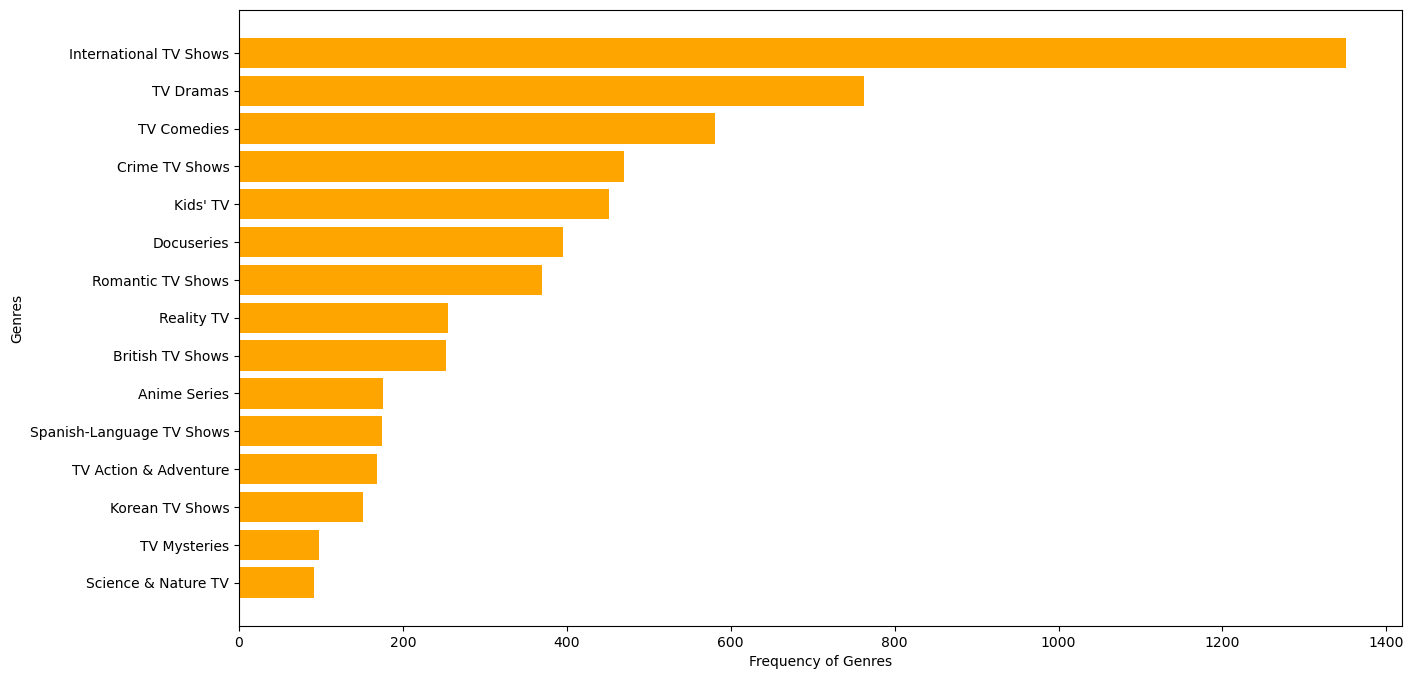

In [85]:
df_genre=df_shows.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['listed_in'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

##### Insights
1. Intl TV Shows, Dramas, Comedy genres are popular across TV Shows

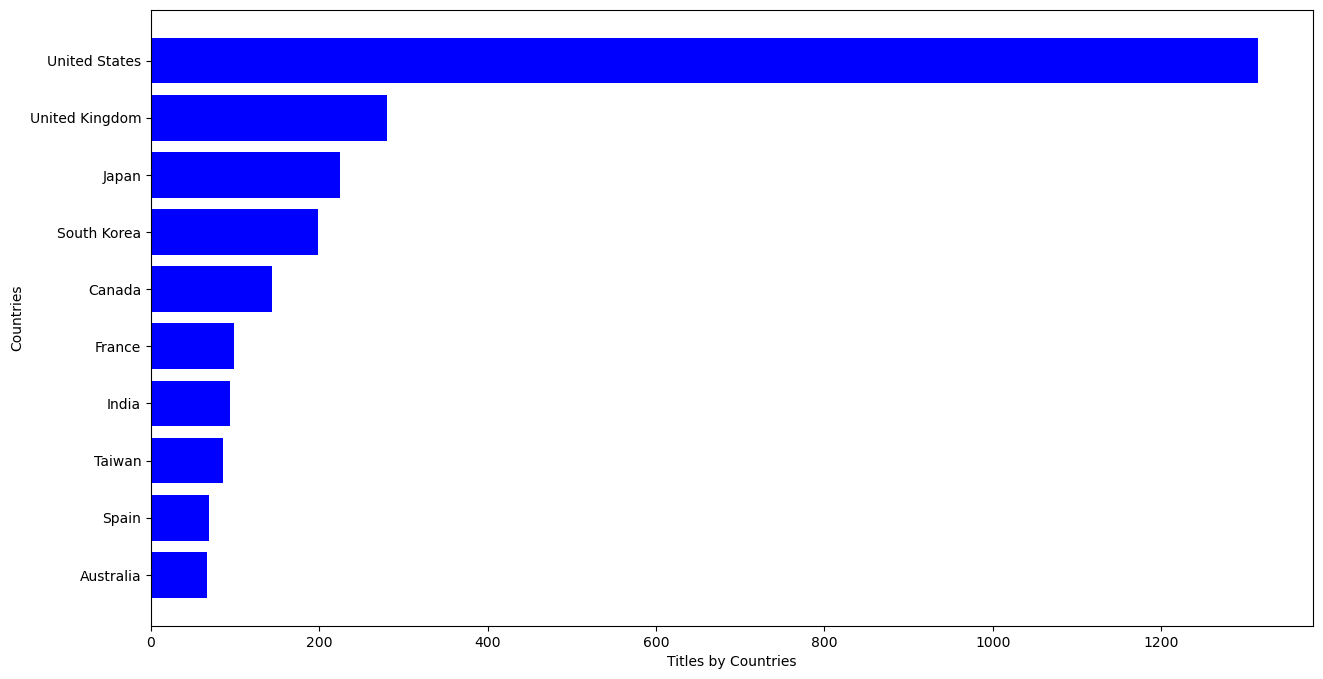

In [86]:
df_country=df_shows.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_country[::-1]['country'], df_country[::-1]['title'],color=['blue'])
plt.xlabel('Titles by Countries')
plt.ylabel('Countries')
plt.show()

#### Insights
1. US leads the content across TV Shows, followed by UK, JAPAN and S.Korea 

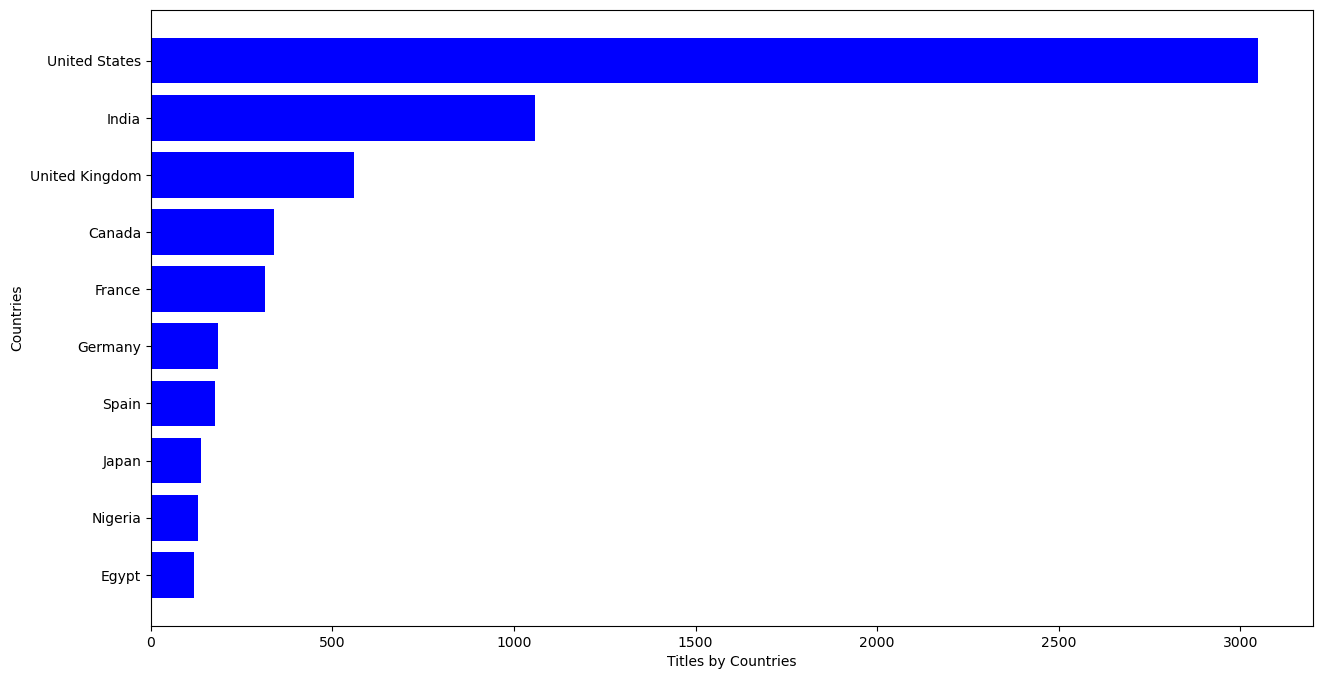

In [87]:
df_country=df_movies.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_country[::-1]['country'], df_country[::-1]['title'],color=['blue'])
plt.xlabel('Titles by Countries')
plt.ylabel('Countries')
plt.show()

#### Insights
1. US leads the content across Movies, followed by India, UK and Canada 

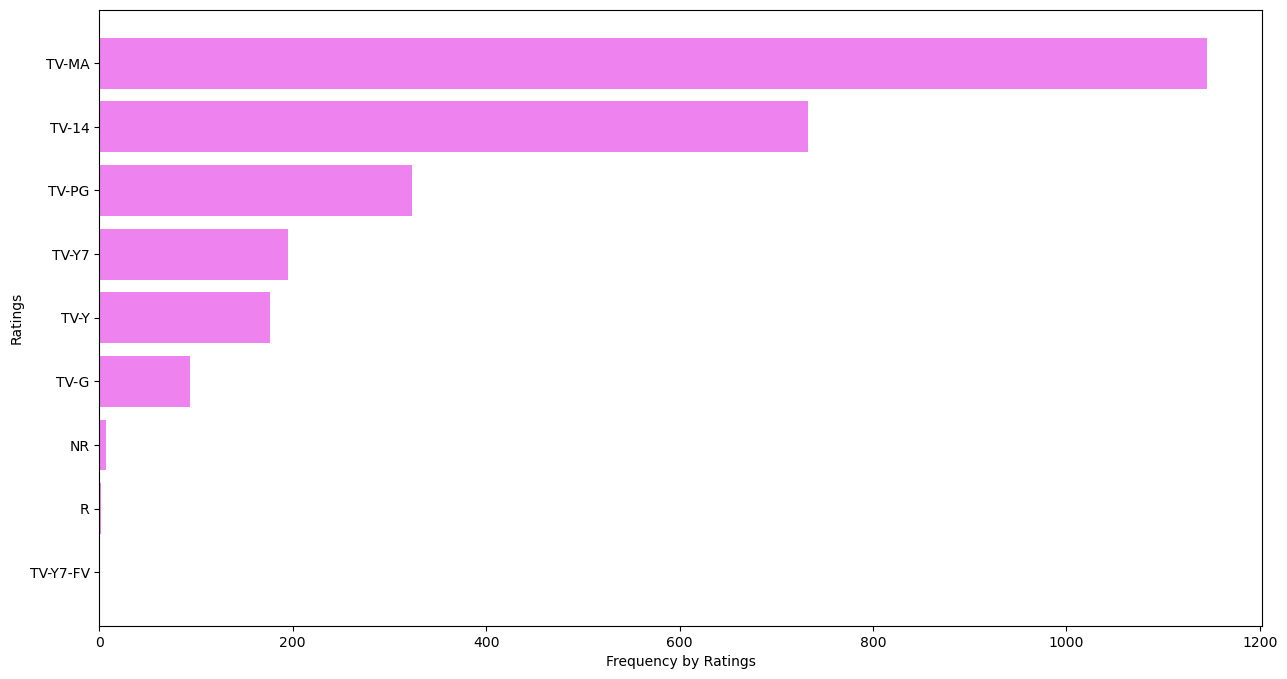

In [88]:
df_rating=df_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

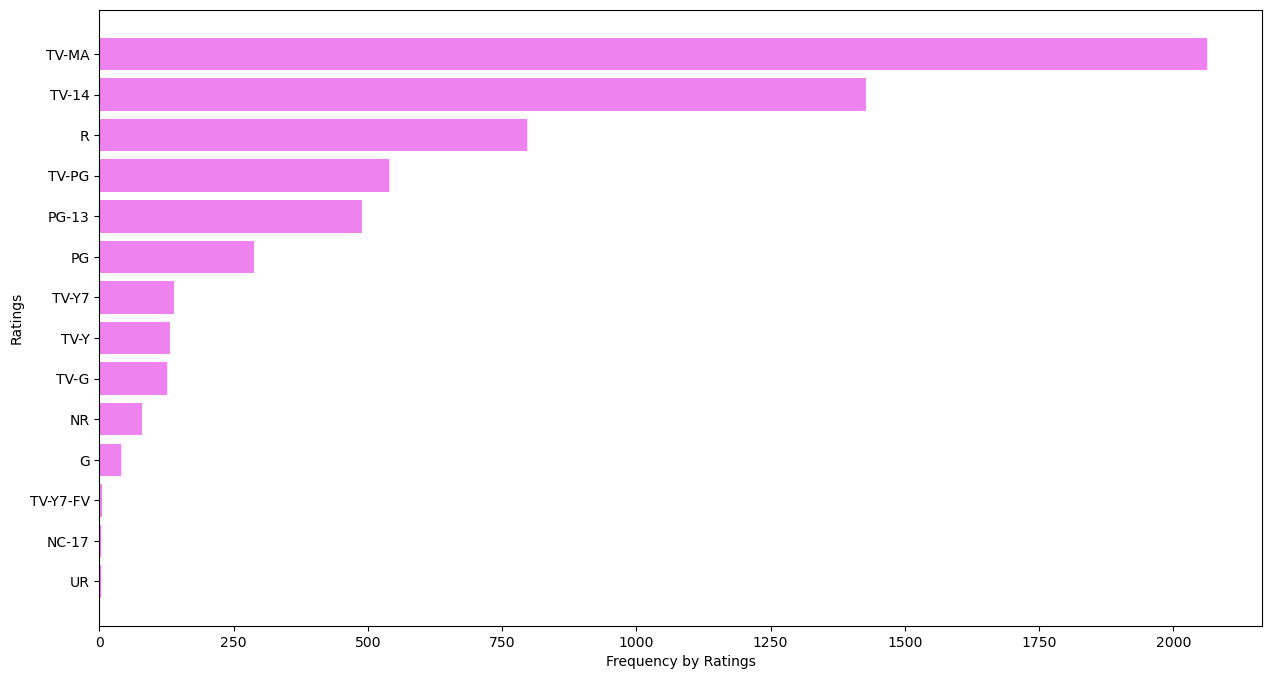

In [89]:
df_rating=df_movies.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

#### Insights
1. Across content, TV MA rating and TV 14 and R are most popular on Netflix platform.

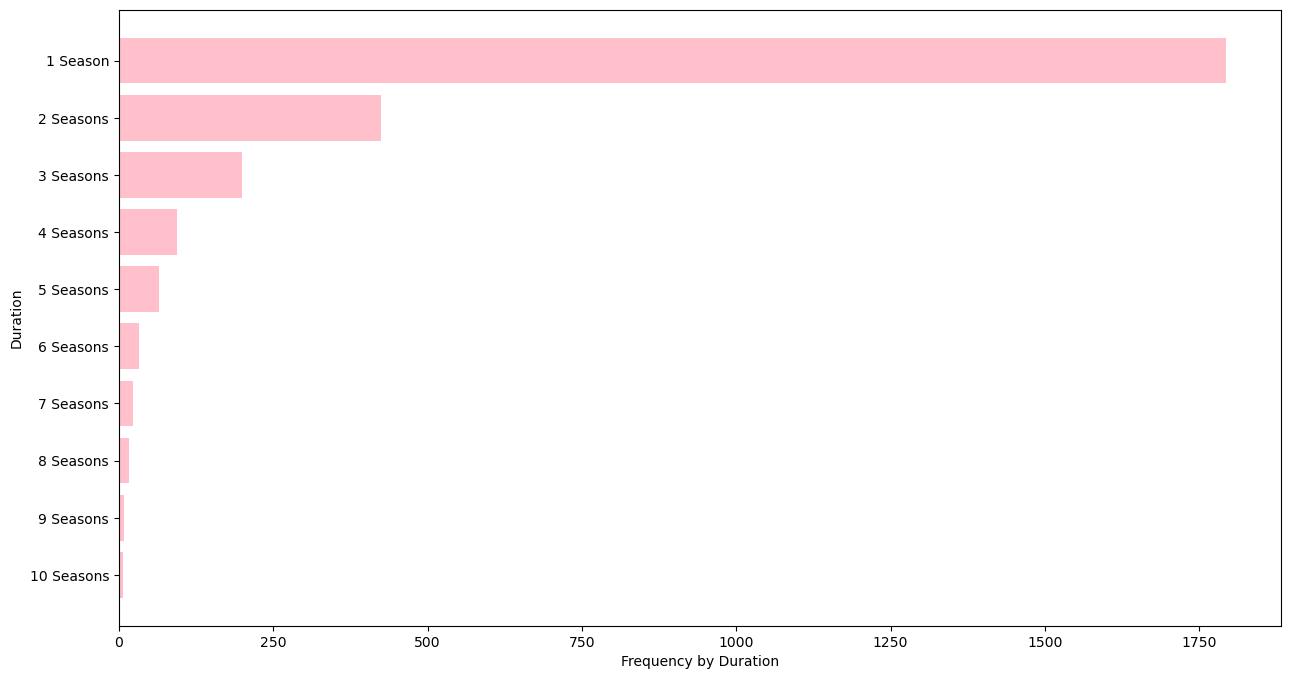

In [90]:
df_duration=df_shows.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['pink'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

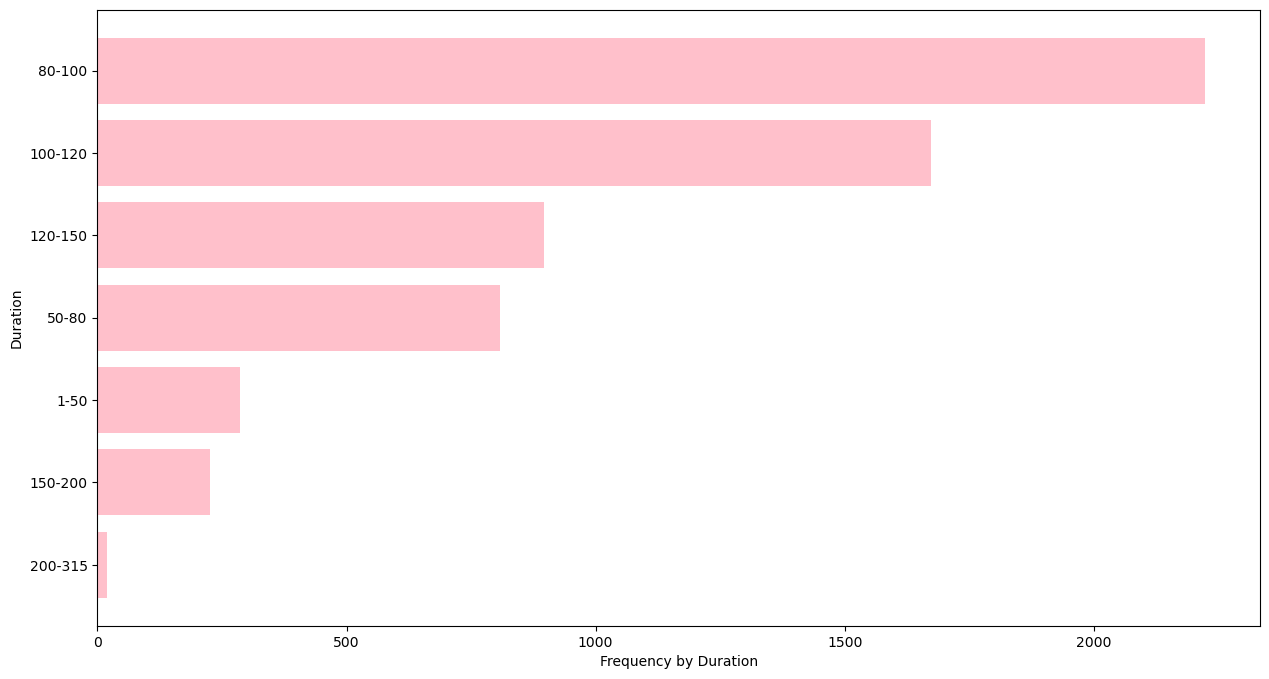

In [91]:
df_duration=df_movies.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['pink'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

#### Insights
1. Most movies lengths lie in range of 80-100 min, 100-120 min and 120-150min. 

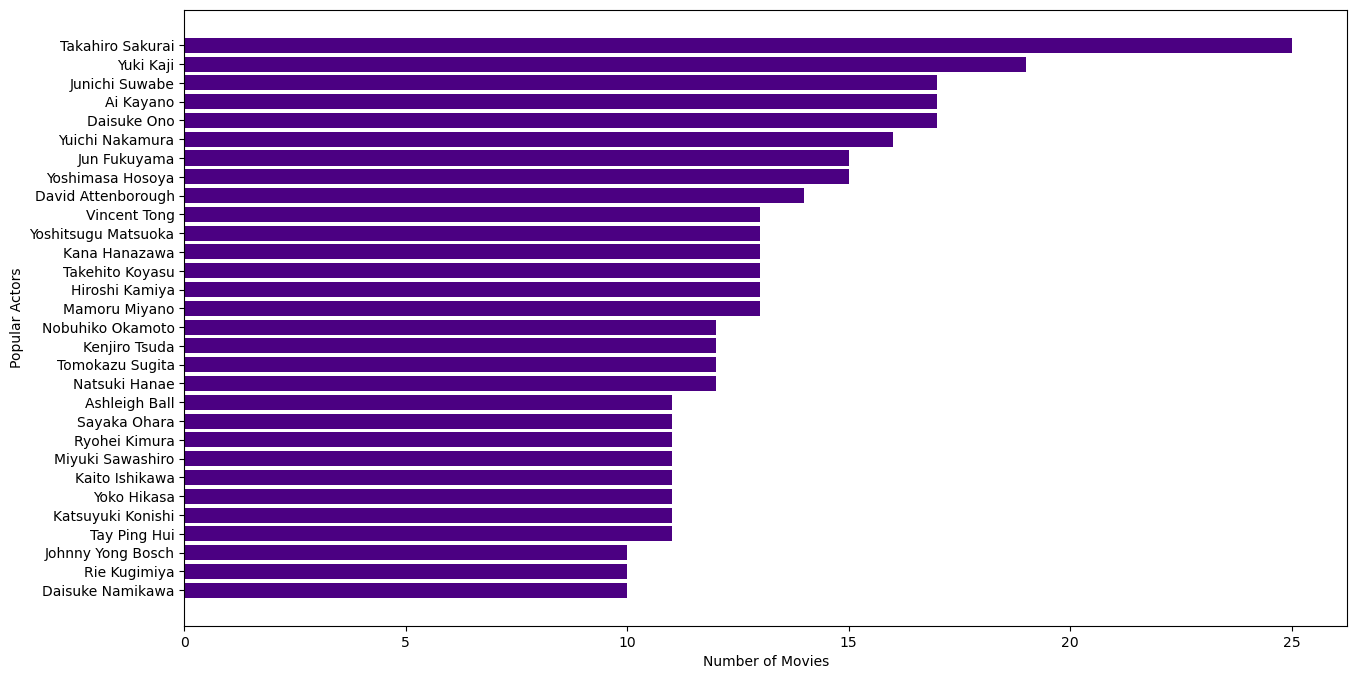

In [92]:
df_actors=df_shows.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_actors=df_actors[df_actors['cast']!='Unknown Cast']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

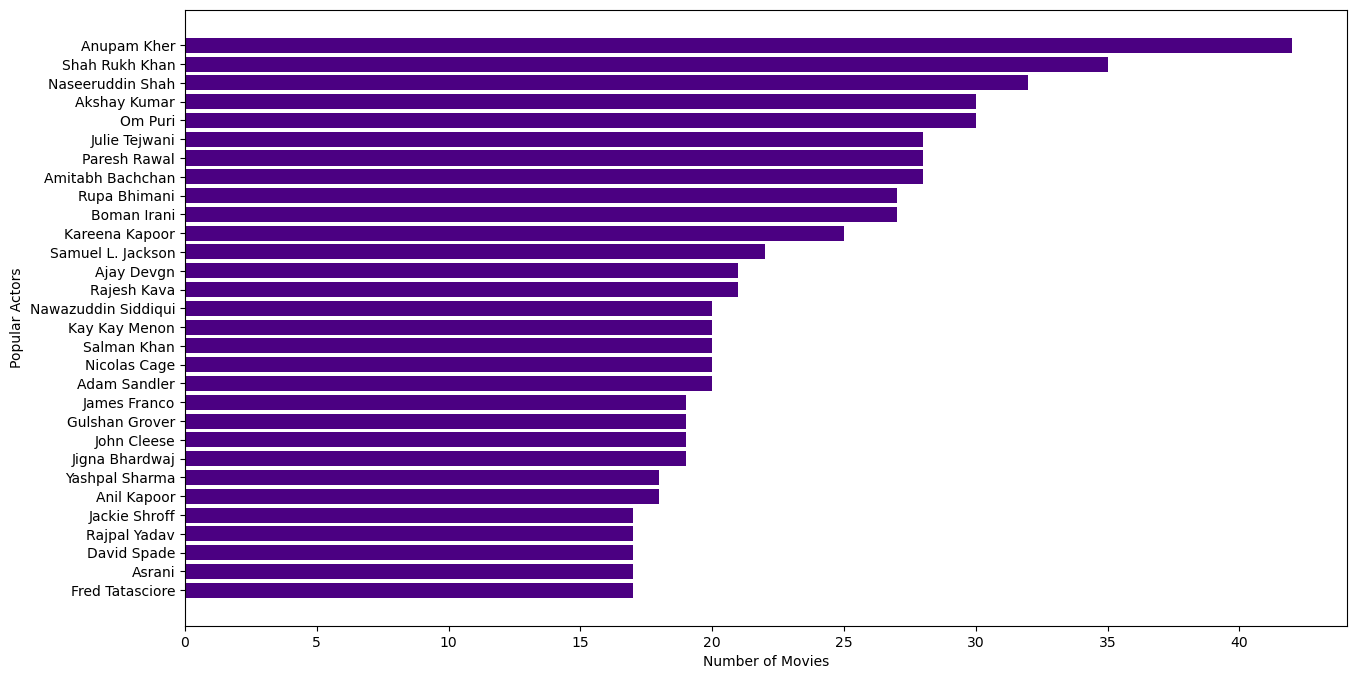

In [106]:
df_actors=df_movies.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_actors=df_actors[df_actors['cast']!='Unknown Cast']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

#### Insights
1. Takahiro, Yuki are popular actos in TV Shows
2. Anupam Kher, SRK, N Shah are popular in Movies

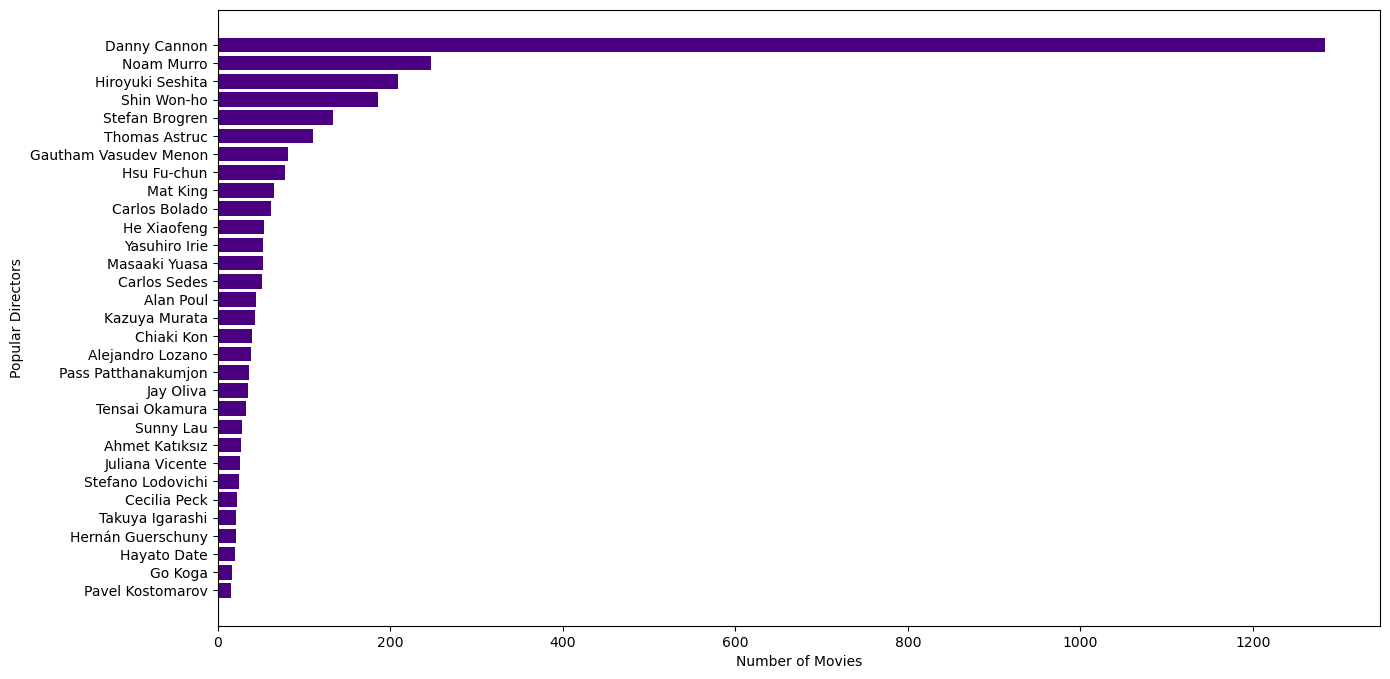

In [93]:
df_directors=df_shows.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_directors=df_directors[df_directors['director']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['director'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

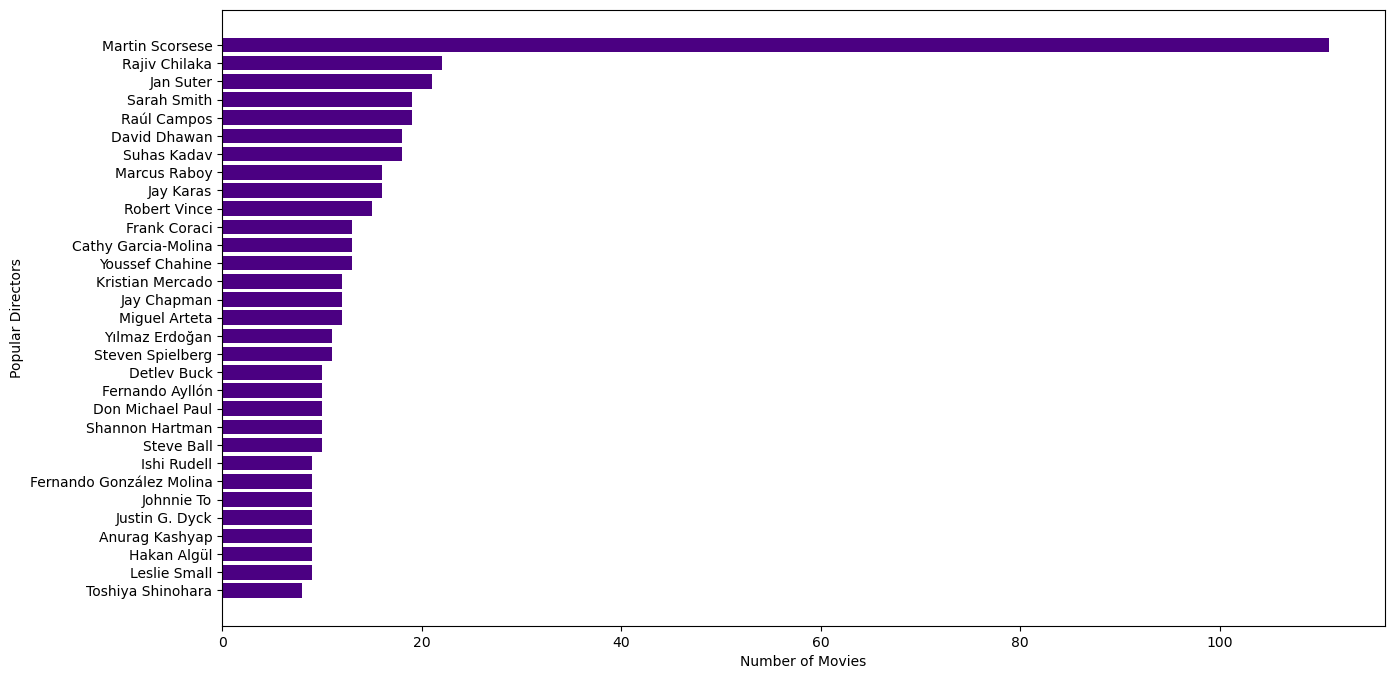

In [95]:
df_directors=df_movies.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_directors=df_directors[df_directors['director']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['director'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

#### Insights
1. Martin Scoresese, Rajiv Chilak are famous movie directors
2. Danny Cannon, Noam Murro are famous TV show directors

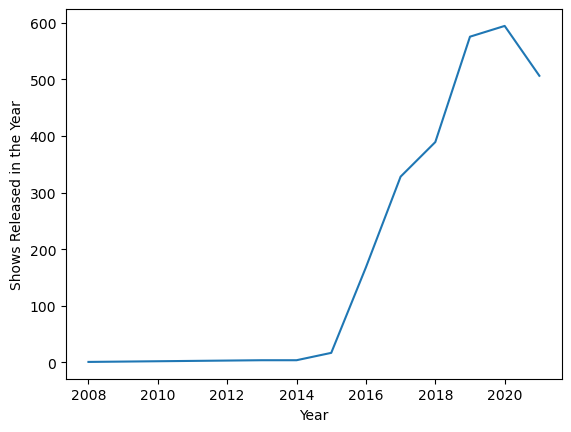

In [94]:
df_year=df_shows.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()

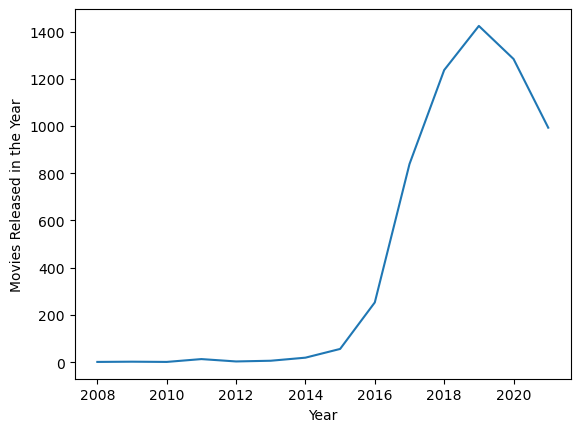

In [95]:
df_year=df_movies.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Movies Released in the Year")
plt.xlabel("Year")
plt.show()

#### Insights
1. After 2014 upto 2019 both TV shows and movies content were aggressively added to Netflix platform

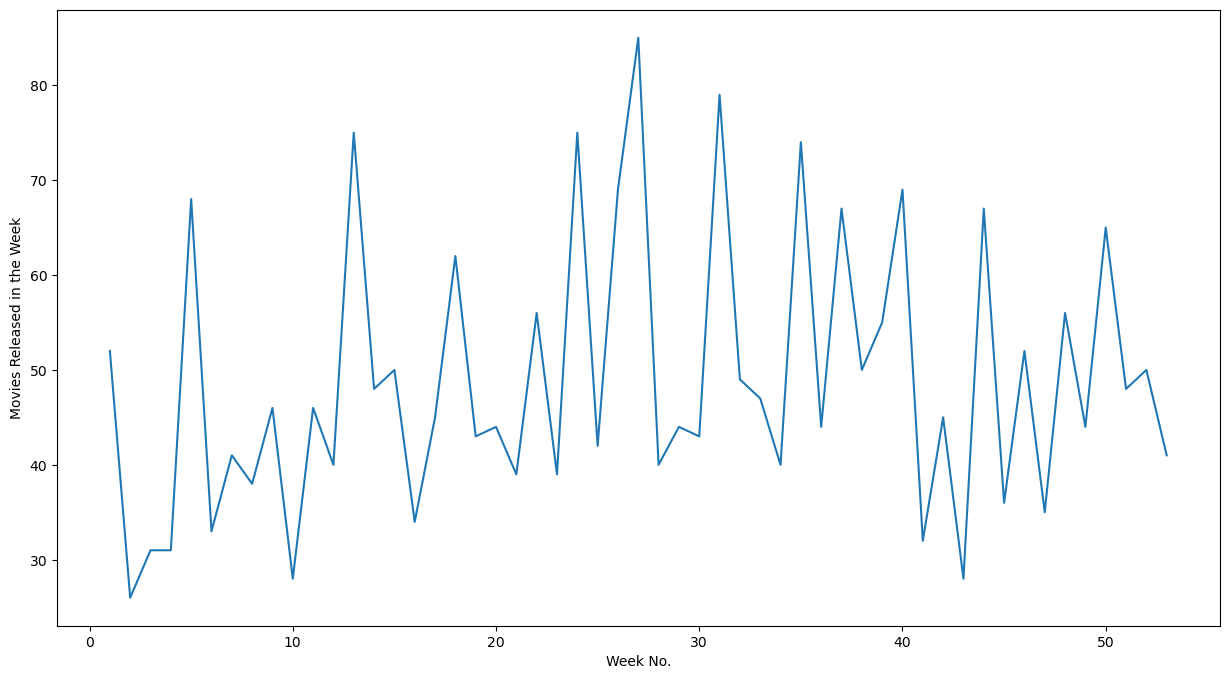

In [96]:
df_week=df_shows.groupby(['week_Added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week_Added', y='title')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

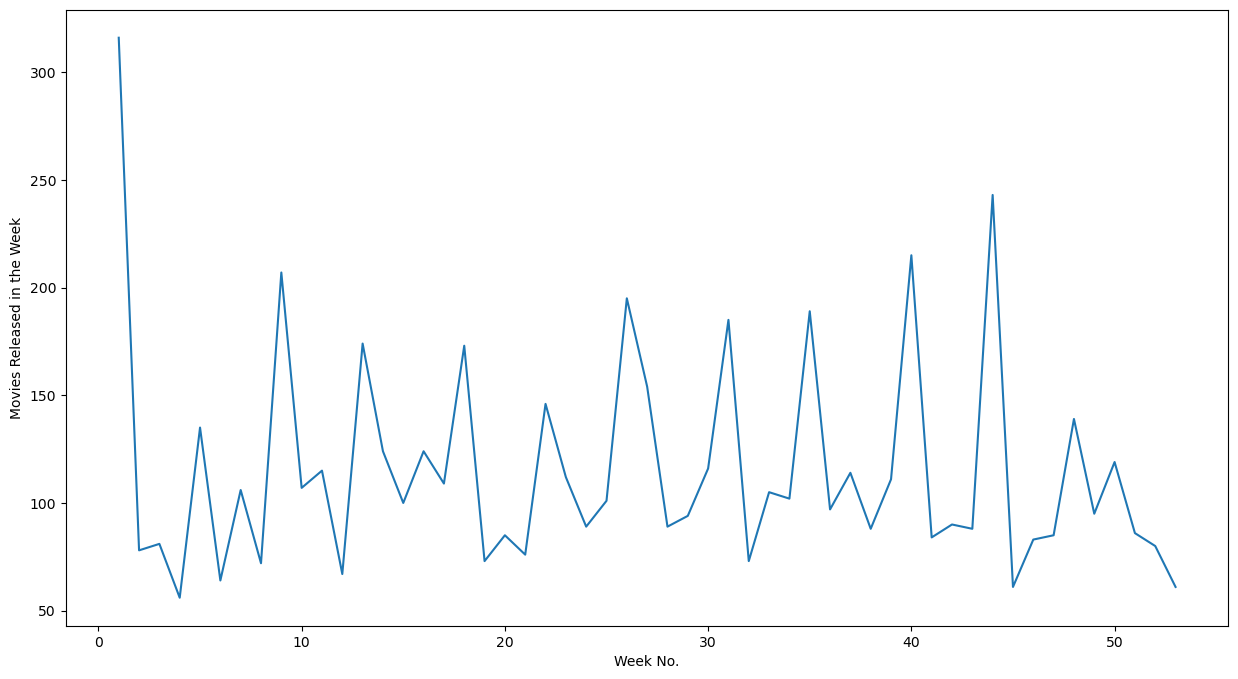

In [97]:
df_week=df_movies.groupby(['week_Added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week_Added', y='title')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

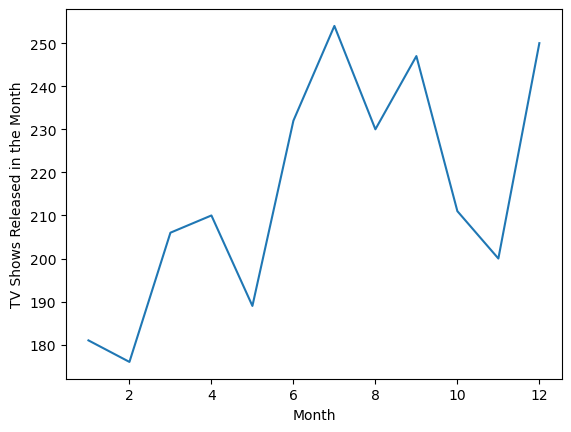

In [98]:
df_month=df_shows.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("TV Shows Released in the Month")
plt.xlabel("Month")
plt.show()

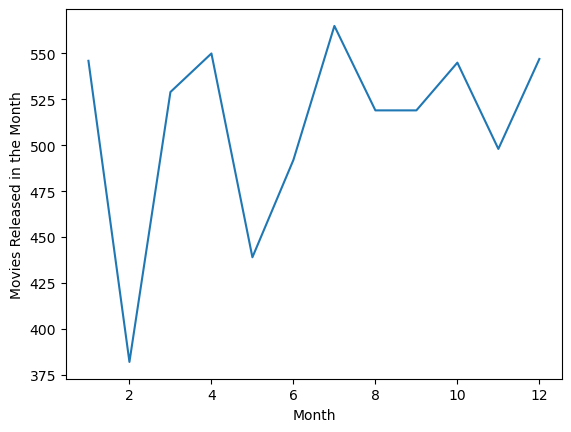

In [99]:
df_month=df_movies.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()

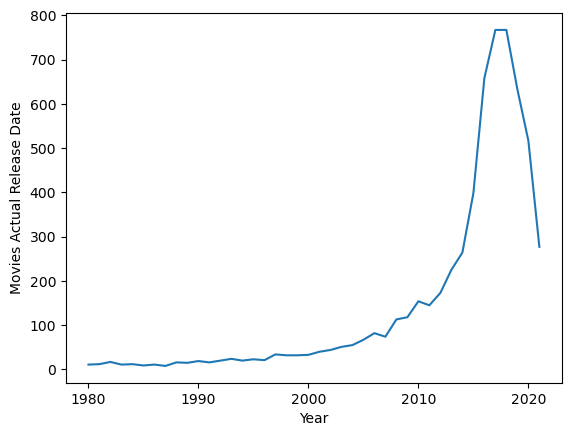

In [100]:
df_release_year=df_movies[df_movies['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

### Questions to be explored

1) So this time, the granularity level is country  and analysis of TV Shows/Movies the country brings. I am going to consider only the top countries individually for TV Shows and Movies. There are definitely some common countries too which bring out quality content in both TV Shows and Movies.

2) Which Genres do these countries offer and what are the intended audiences(Ratings) which are popular in Netflix?

3) In case of Movies, what is the duration/length of movies which makes them special and depicts attention span?

4) Who are the popular actors/directors across TV Shows and Movies in these countries?

5) In what time of the year, people tend to watch movies and shows in these countries?

6) Popular Actor and Director Combinations in these countries

In [101]:
#below countries will be analyzed for both shows and movies
shows_and_movies=['United States','India','United Kingdom']
#below countries will be only analyzed on basis of shows
only_shows=['Japan','South Korea']

In [102]:
#Analyzing USA for both shows and movies
df_usa_shows=df_final1[df_final1['country']=='United States'][df_final1[df_final1['country']=='United States']['type']=='TV Show']
df_usa_movies=df_final1[df_final1['country']=='United States'][df_final1[df_final1['country']=='United States']['type']=='Movie']

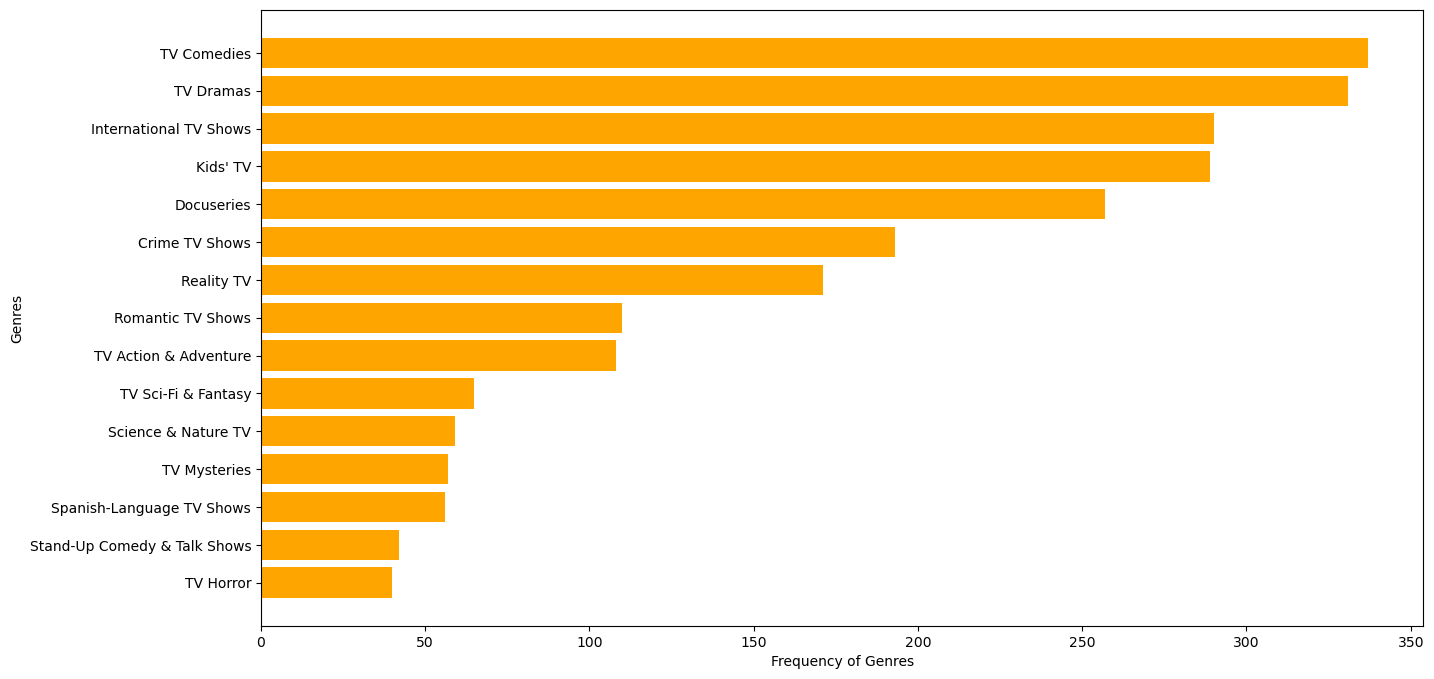

In [103]:
df_genre=df_usa_shows.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['listed_in'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

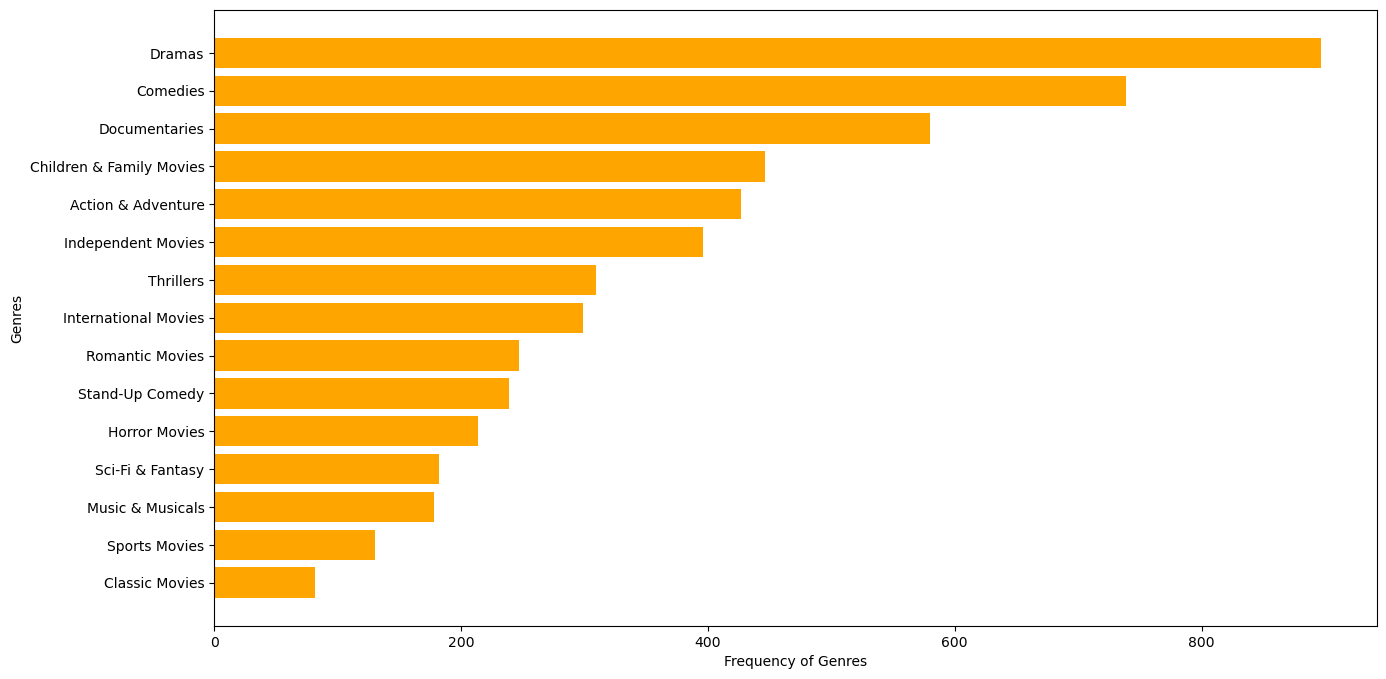

In [104]:
df_genre=df_usa_movies.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['listed_in'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

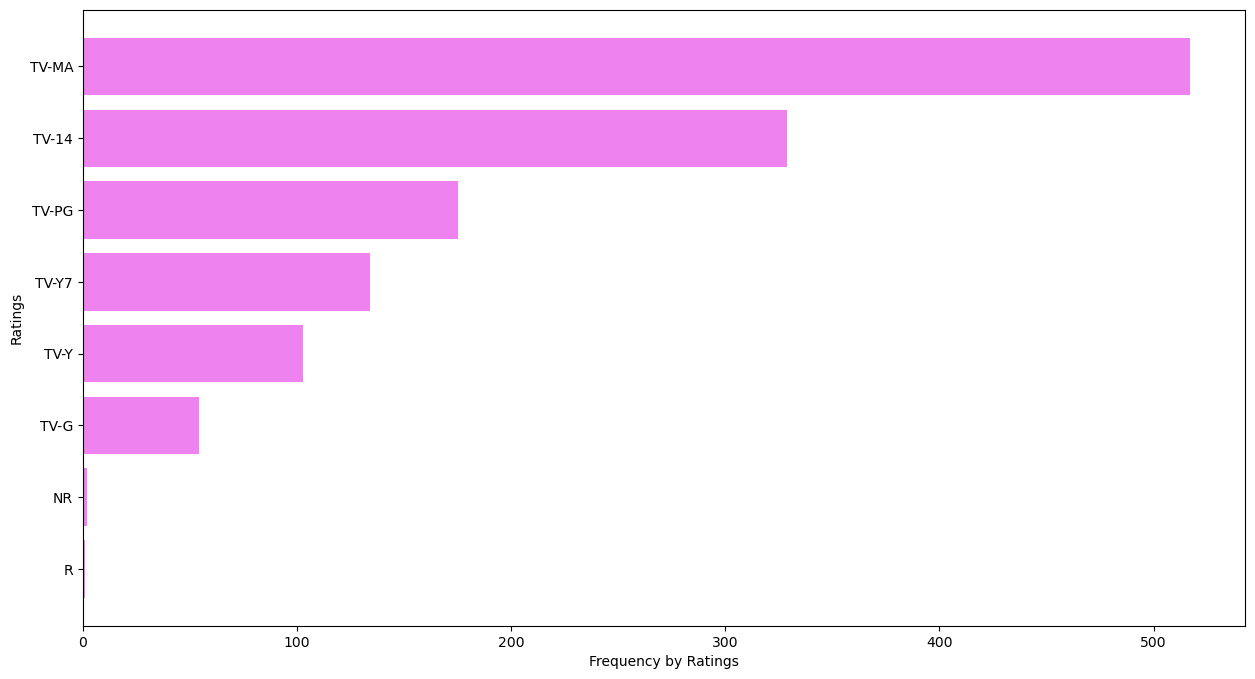

In [105]:
df_rating=df_usa_shows.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

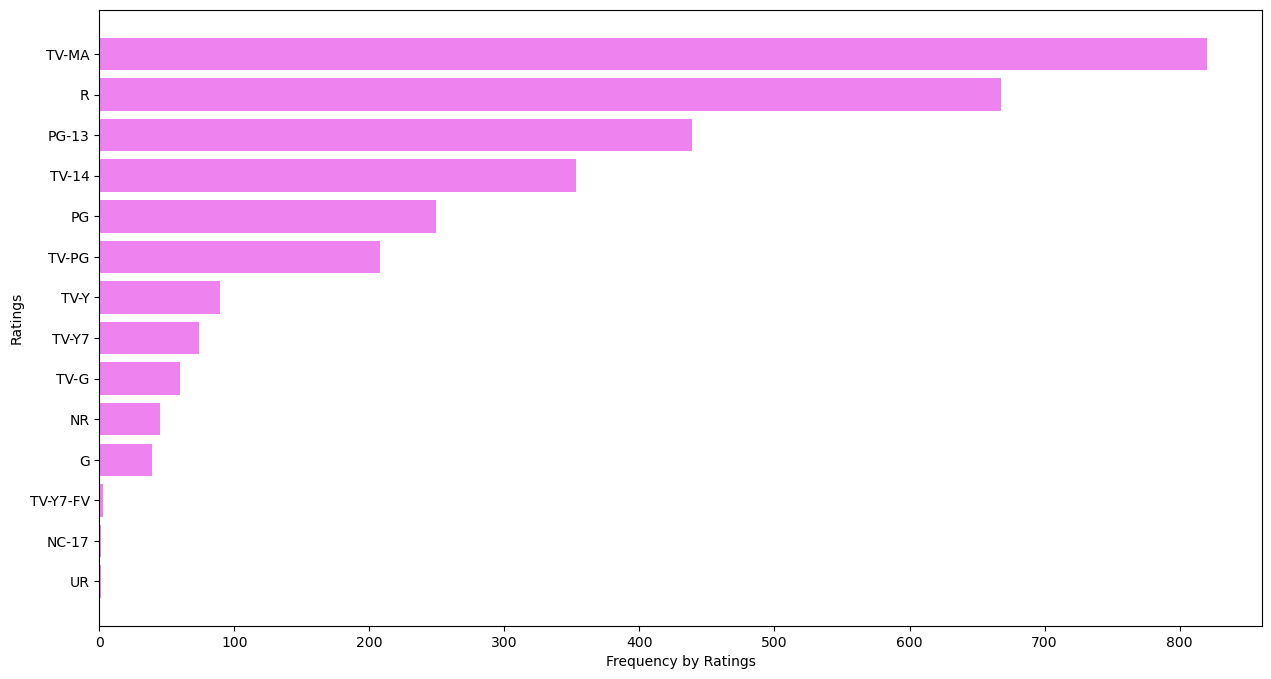

In [106]:
df_rating=df_usa_movies.groupby(['rating']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_rating[::-1]['rating'], df_rating[::-1]['title'],color=['violet'])
plt.xlabel('Frequency by Ratings')
plt.ylabel('Ratings')
plt.show()

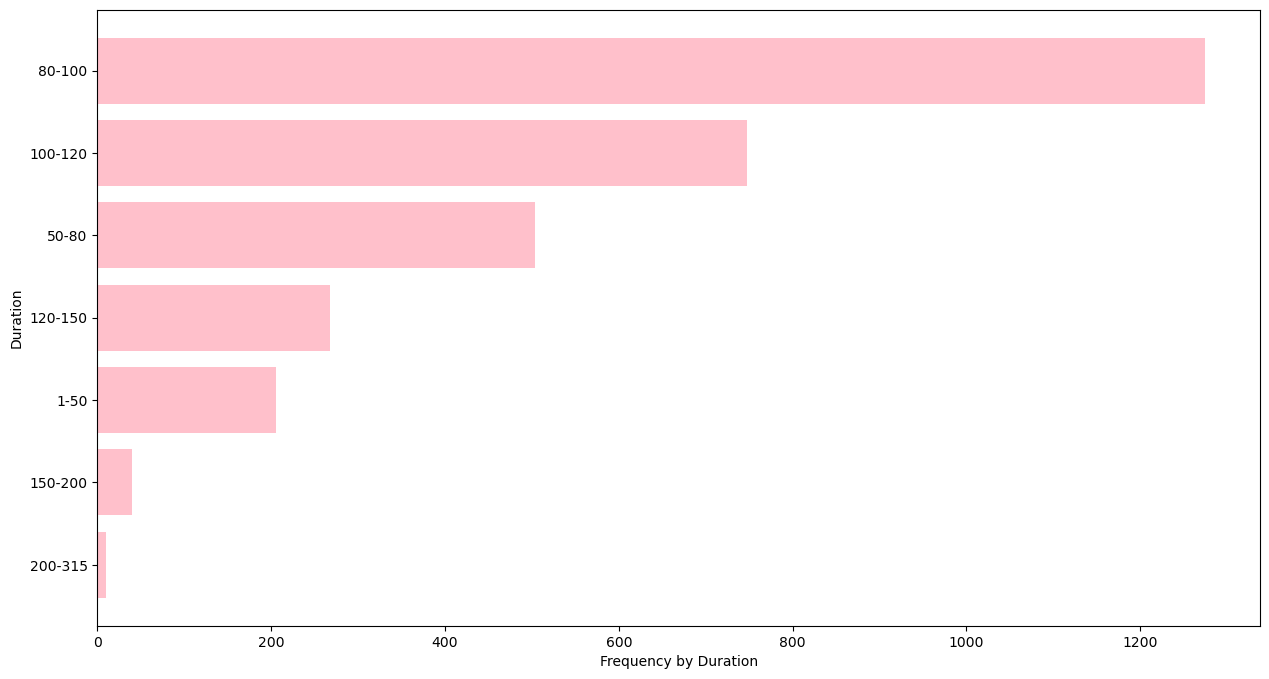

In [107]:
df_duration=df_usa_movies.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['pink'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

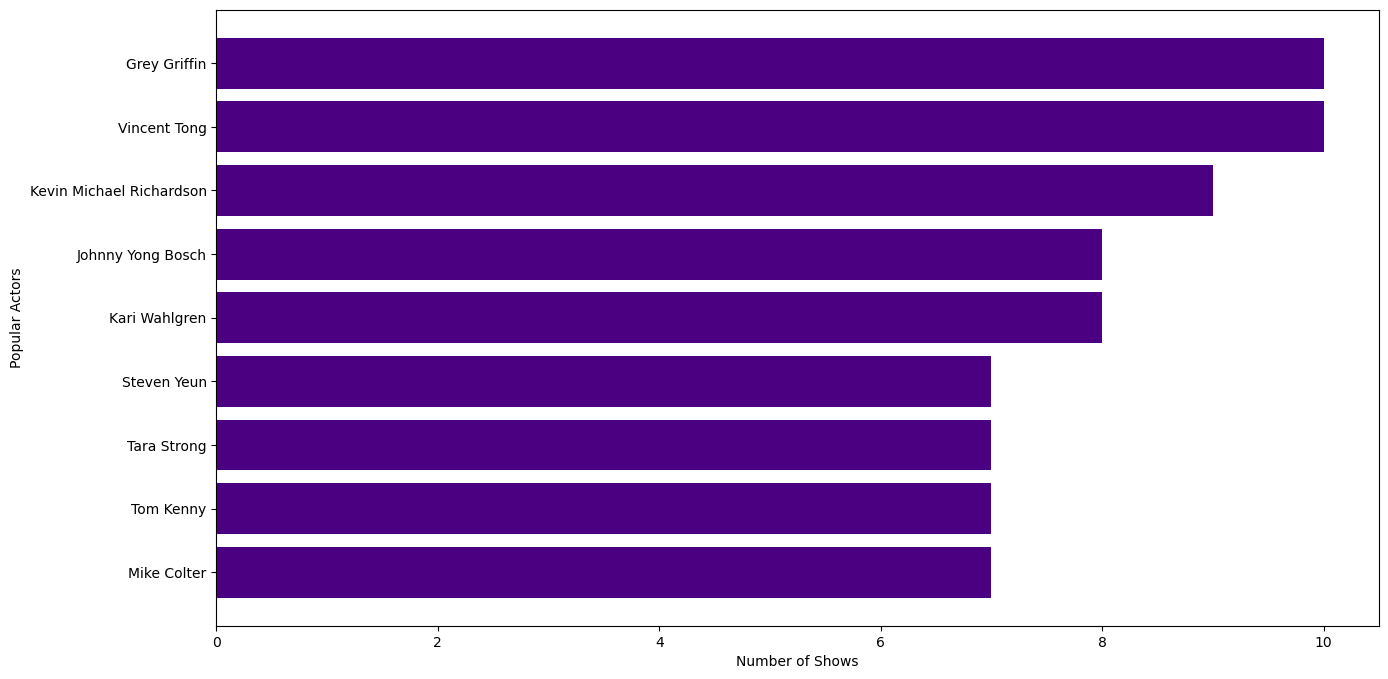

In [108]:
df_actors=df_usa_shows.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_actors=df_actors[df_actors['cast']!='Unknown Cast']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actors')
plt.show()

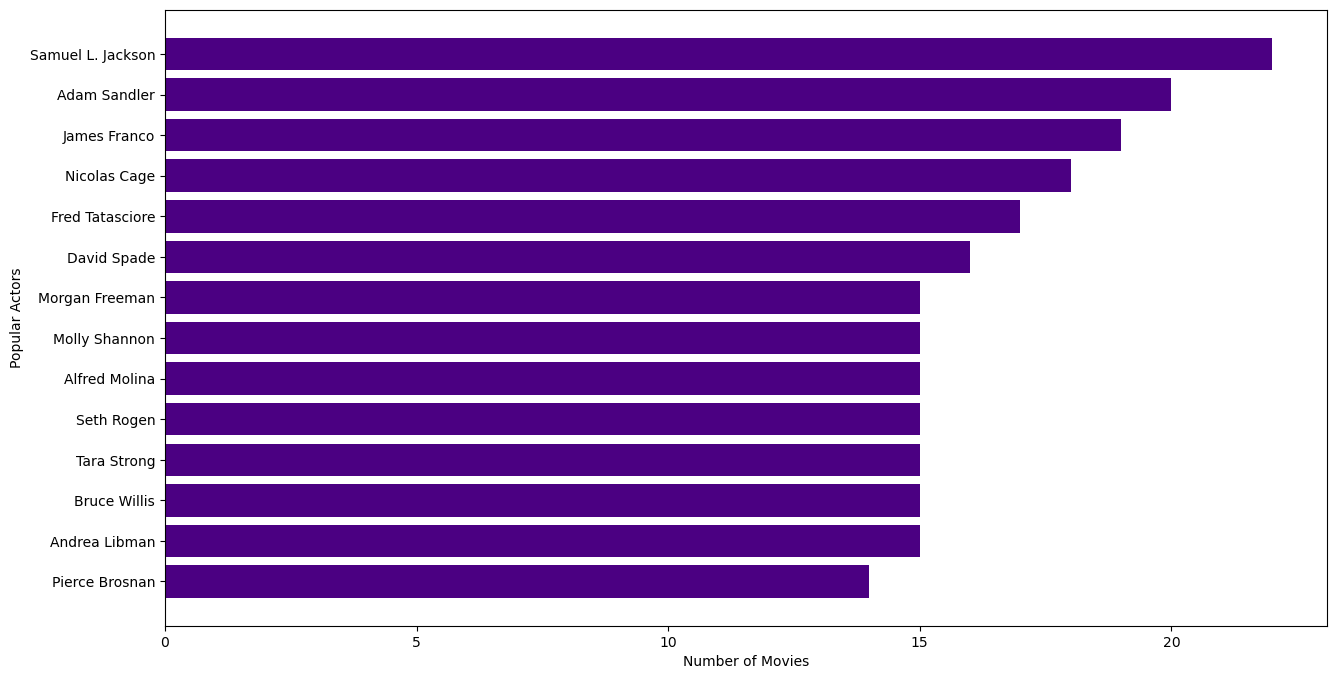

In [109]:
df_actors=df_usa_movies.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_actors=df_actors[df_actors['cast']!='Unknown Cast']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

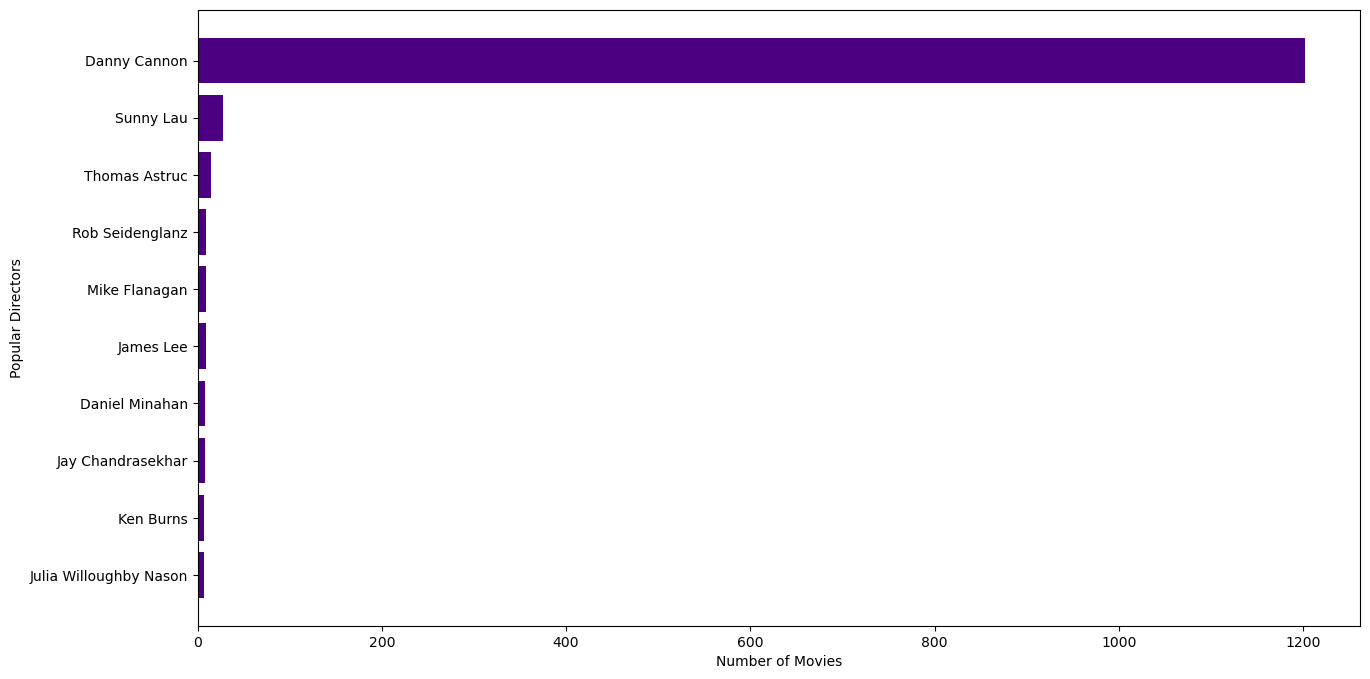

In [110]:
df_directors=df_usa_shows.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_directors=df_directors[df_directors['director']!='Unknown director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['director'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

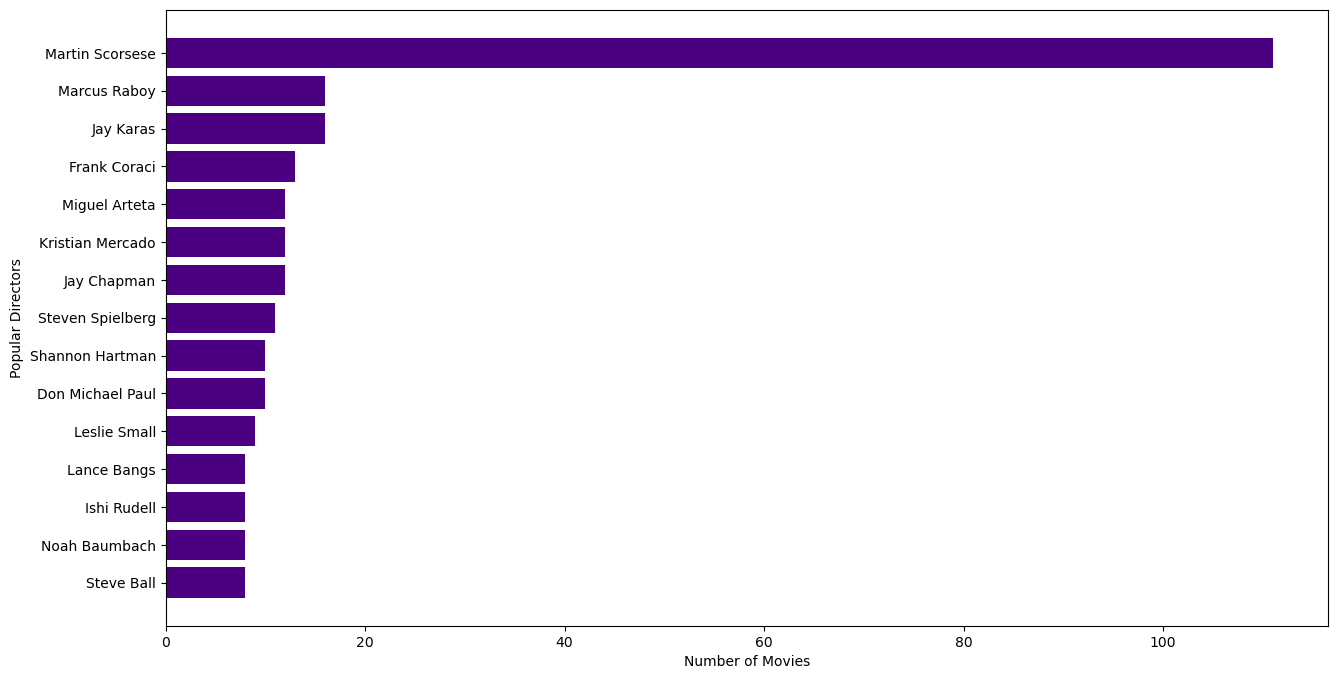

In [111]:
df_directors=df_usa_movies.groupby(['director']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_directors=df_directors[df_directors['director']!='Unknown director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['director'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

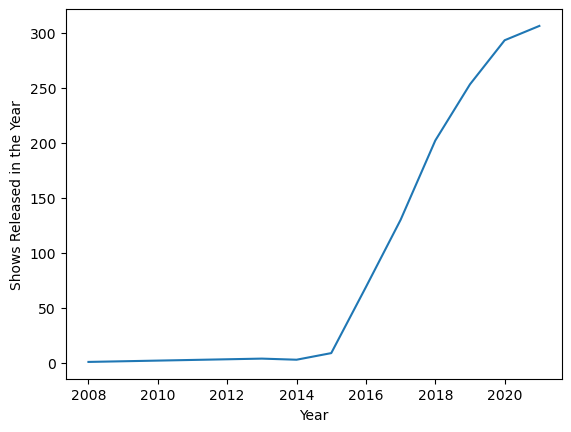

In [112]:
df_year=df_usa_shows.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()

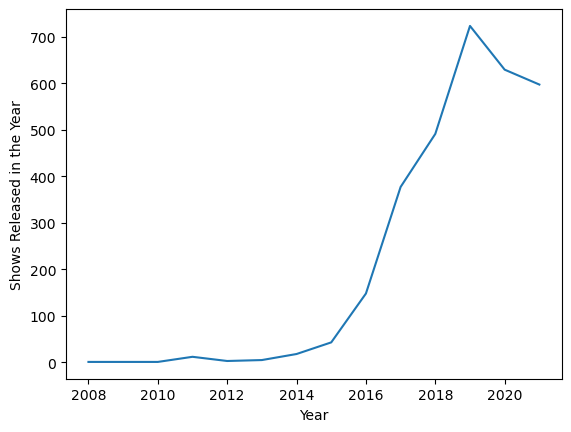

In [113]:
df_year=df_usa_movies.groupby(['year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_year, x='year', y='title')
plt.ylabel("Shows Released in the Year")
plt.xlabel("Year")
plt.show()

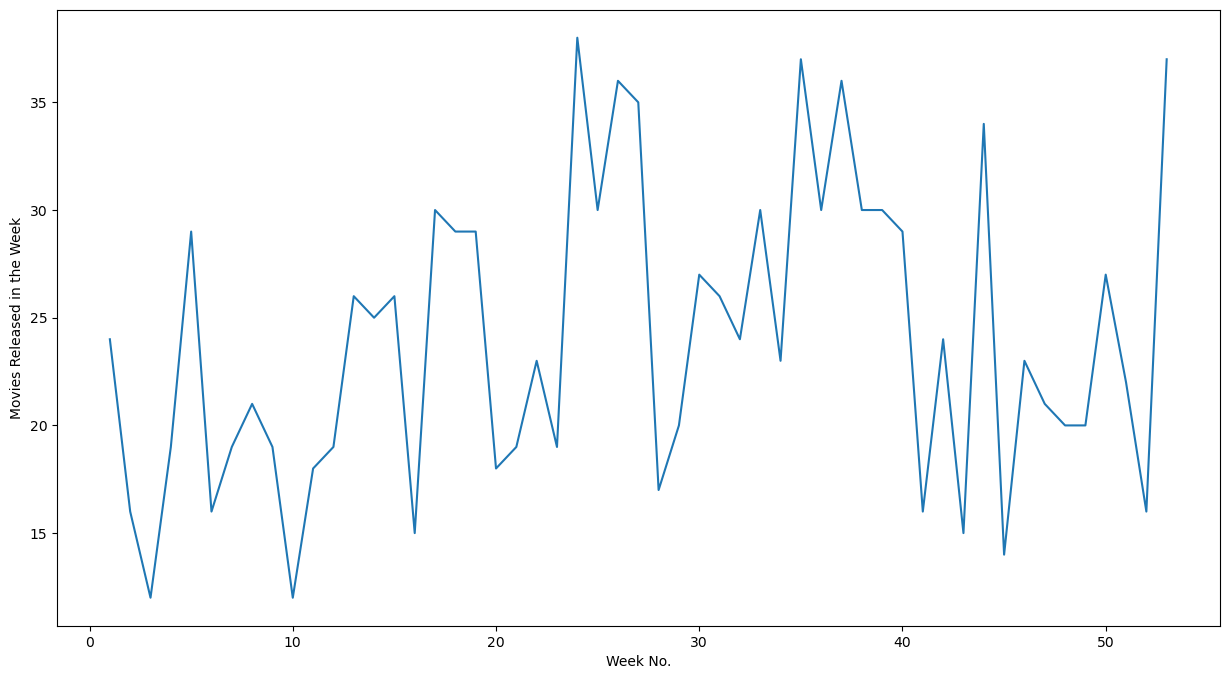

In [114]:
df_week=df_usa_shows.groupby(['week_Added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week_Added', y='title')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

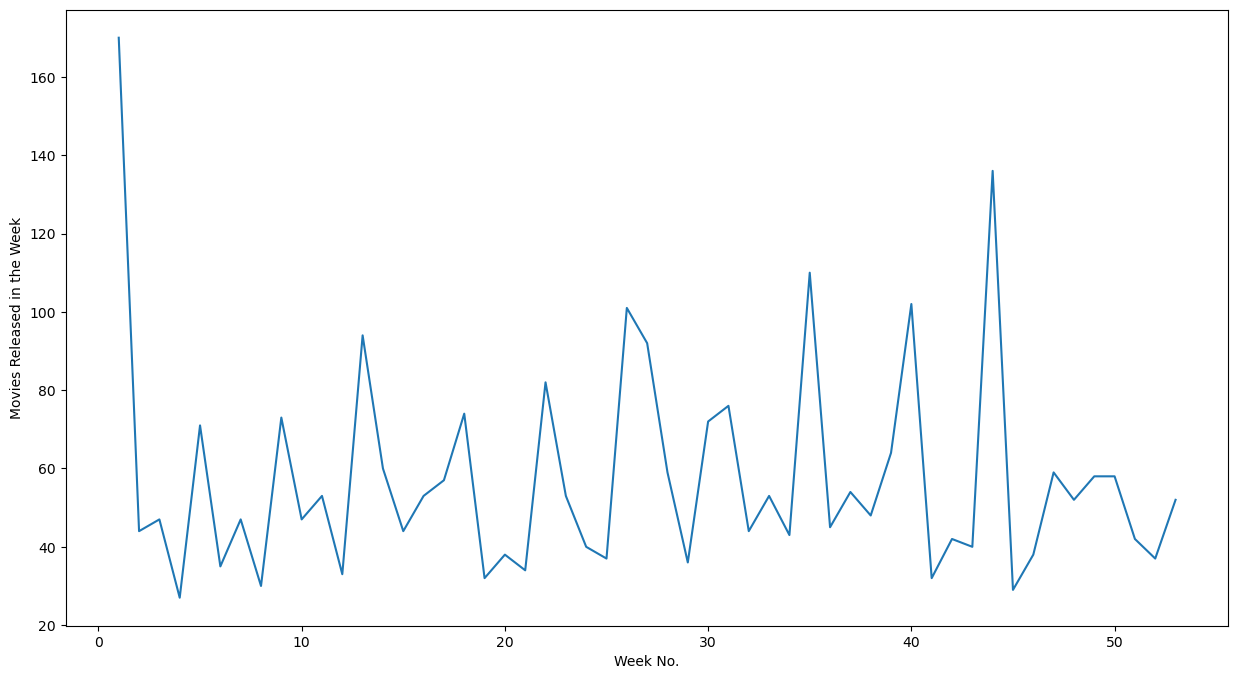

In [115]:
df_week=df_usa_movies.groupby(['week_Added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week_Added', y='title')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

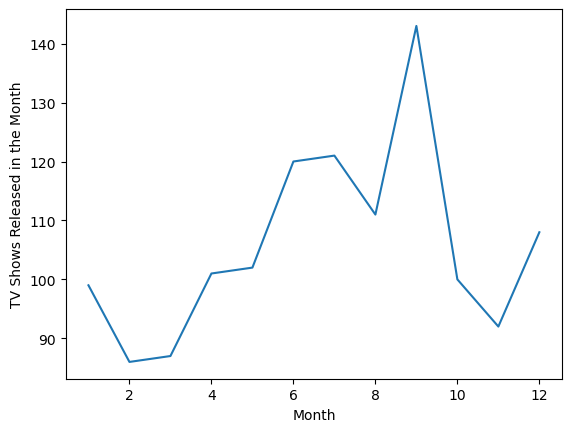

In [116]:
df_month=df_usa_shows.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("TV Shows Released in the Month")
plt.xlabel("Month")
plt.show()

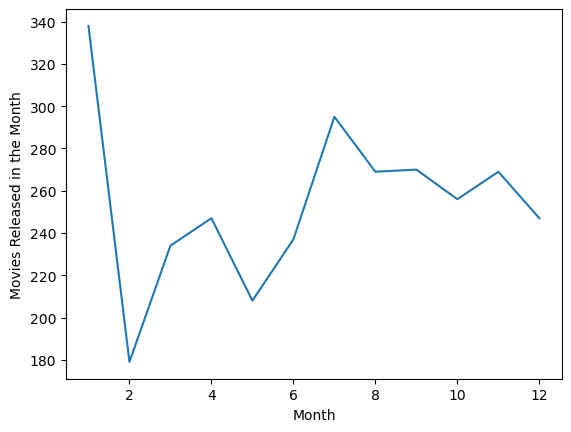

In [117]:
df_month=df_usa_movies.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()

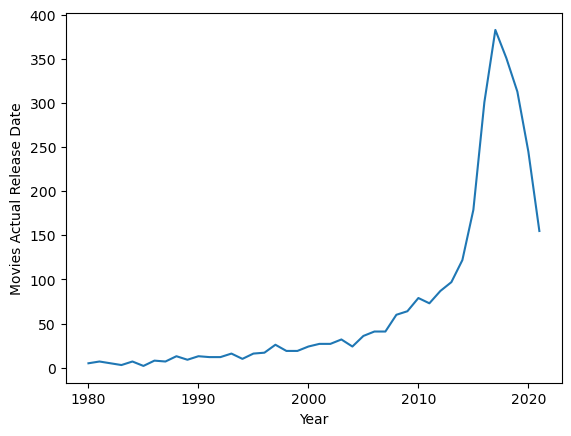

In [118]:
df_release_year=df_usa_movies[df_usa_movies['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

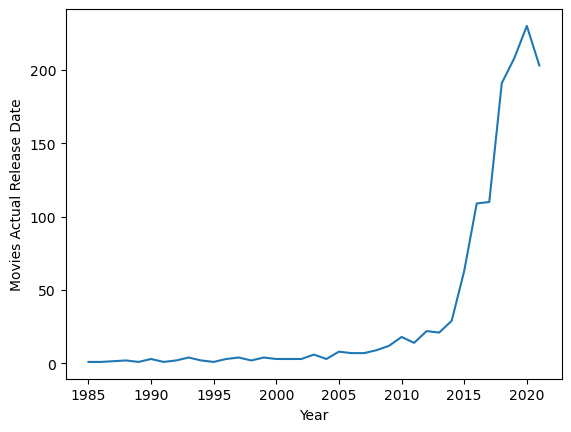

In [119]:
df_release_year=df_usa_shows[df_usa_shows['release_year']>=1980].groupby(['release_year']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_release_year, x='release_year', y='title')
plt.ylabel("Movies Actual Release Date")
plt.xlabel("Year")
plt.show()

In [120]:
df_usa_movies.head()

,title,cast,listed_in,director,country,show_id,type,date_added,release_year,rating,duration,duration_copy,Modified_Added_date,month_added,week_Added,year
0,Dick Johnson Is Dead,Kirsten Johnson,Documentaries,Kirsten Johnson,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100,80-100,2021-09-25,9.0,38,2021.0
159,My Little Pony: A New Generation,Vanessa Hudgens,Children & Family Movies,Robert Cullen,United States,s7,Movie,"September 24, 2021",2021,PG,80-100,80-100,2021-09-24,9.0,38,2021.0
160,My Little Pony: A New Generation,Vanessa Hudgens,Children & Family Movies,José Luis Ucha,United States,s7,Movie,"September 24, 2021",2021,PG,80-100,80-100,2021-09-24,9.0,38,2021.0
161,My Little Pony: A New Generation,Kimiko Glenn,Children & Family Movies,Robert Cullen,United States,s7,Movie,"September 24, 2021",2021,PG,80-100,80-100,2021-09-24,9.0,38,2021.0
162,My Little Pony: A New Generation,Kimiko Glenn,Children & Family Movies,José Luis Ucha,United States,s7,Movie,"September 24, 2021",2021,PG,80-100,80-100,2021-09-24,9.0,38,2021.0


In [121]:
#Analysing a combination of actors and directors
df_usa_movies['Actor_Director_Combination'] = df_usa_movies.cast.str.cat(df_usa_movies.director, sep=' and ')
df_usa_movies_subset=df_usa_movies[df_usa_movies['cast']!='Unknown Cast']
df_usa_movies_subset=df_usa_movies_subset[df_usa_movies_subset['director']!='Unknown director']
df_usa_movies_subset.head()

,title,cast,listed_in,director,country,show_id,type,date_added,release_year,rating,duration,duration_copy,Modified_Added_date,month_added,week_Added,year,Actor_Director_Combination
0,Dick Johnson Is Dead,Kirsten Johnson,Documentaries,Kirsten Johnson,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100,80-100,2021-09-25,9.0,38,2021.0,Kirsten Johnson and Kirsten Johnson
159,My Little Pony: A New Generation,Vanessa Hudgens,Children & Family Movies,Robert Cullen,United States,s7,Movie,"September 24, 2021",2021,PG,80-100,80-100,2021-09-24,9.0,38,2021.0,Vanessa Hudgens and Robert Cullen
160,My Little Pony: A New Generation,Vanessa Hudgens,Children & Family Movies,José Luis Ucha,United States,s7,Movie,"September 24, 2021",2021,PG,80-100,80-100,2021-09-24,9.0,38,2021.0,Vanessa Hudgens and José Luis Ucha
161,My Little Pony: A New Generation,Kimiko Glenn,Children & Family Movies,Robert Cullen,United States,s7,Movie,"September 24, 2021",2021,PG,80-100,80-100,2021-09-24,9.0,38,2021.0,Kimiko Glenn and Robert Cullen
162,My Little Pony: A New Generation,Kimiko Glenn,Children & Family Movies,José Luis Ucha,United States,s7,Movie,"September 24, 2021",2021,PG,80-100,80-100,2021-09-24,9.0,38,2021.0,Kimiko Glenn and José Luis Ucha


In [122]:
df_usa_shows['Actor_Director_Combination'] = df_usa_shows.cast.str.cat(df_usa_shows.director, sep=' and ')
df_usa_shows_subset=df_usa_shows[df_usa_shows['cast']!='Unknown Cast']
df_usa_shows_subset=df_usa_shows_subset[df_usa_shows_subset['director']!='Unknown director']
df_usa_shows_subset.head()

,title,cast,listed_in,director,country,show_id,type,date_added,release_year,rating,duration,duration_copy,Modified_Added_date,month_added,week_Added,year,Actor_Director_Combination
58,Ganglands,Sami Bouajila,Crime TV Shows,Julien Leclercq,United States,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season,<1,2021-09-24,9.0,38,2021.0,Sami Bouajila and Julien Leclercq
59,Ganglands,Sami Bouajila,International TV Shows,Julien Leclercq,United States,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season,<1,2021-09-24,9.0,38,2021.0,Sami Bouajila and Julien Leclercq
60,Ganglands,Sami Bouajila,TV Action & Adventure,Julien Leclercq,United States,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season,<1,2021-09-24,9.0,38,2021.0,Sami Bouajila and Julien Leclercq
61,Ganglands,Tracy Gotoas,Crime TV Shows,Julien Leclercq,United States,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season,<1,2021-09-24,9.0,38,2021.0,Tracy Gotoas and Julien Leclercq
62,Ganglands,Tracy Gotoas,International TV Shows,Julien Leclercq,United States,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season,<1,2021-09-24,9.0,38,2021.0,Tracy Gotoas and Julien Leclercq


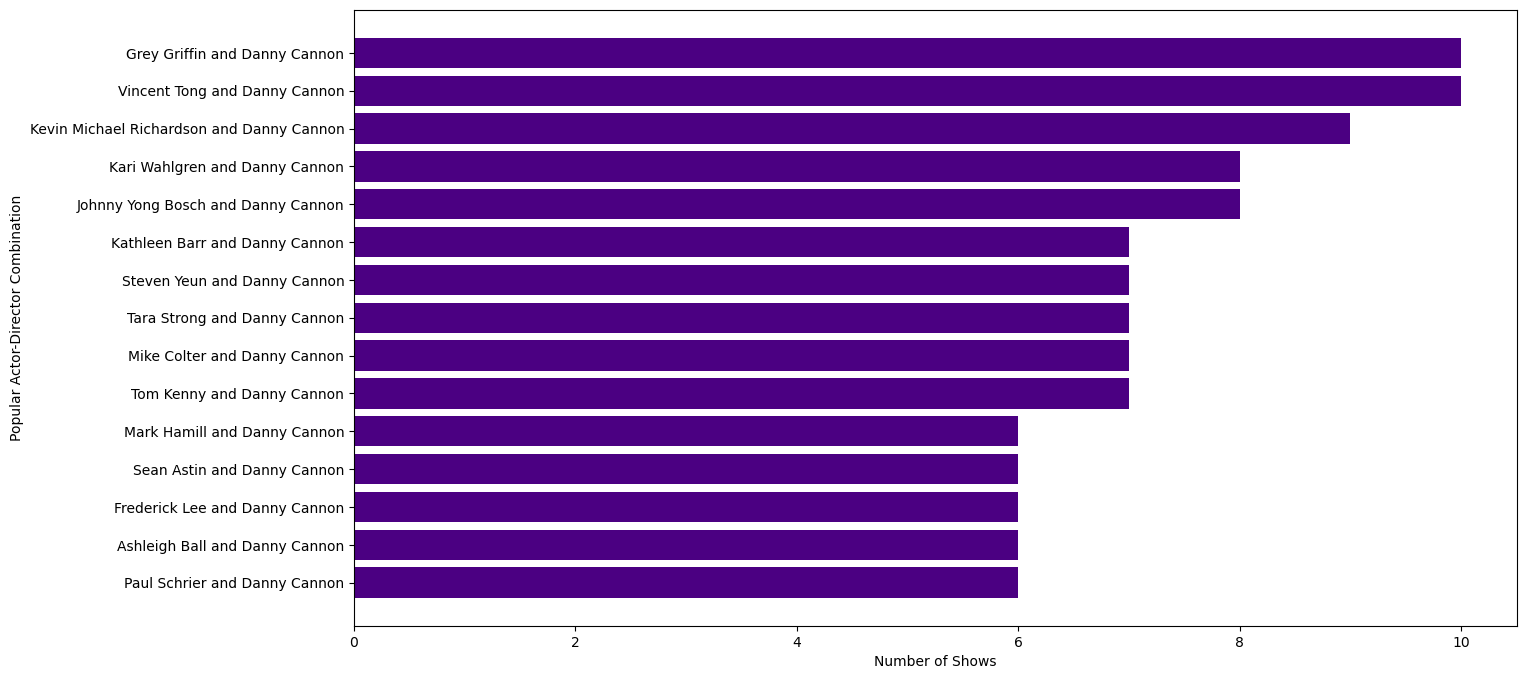

In [123]:
df_actors_directors=df_usa_shows_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_actors_directors[::-1]['Actor_Director_Combination'], df_actors_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Shows')
plt.ylabel('Popular Actor-Director Combination')
plt.show()

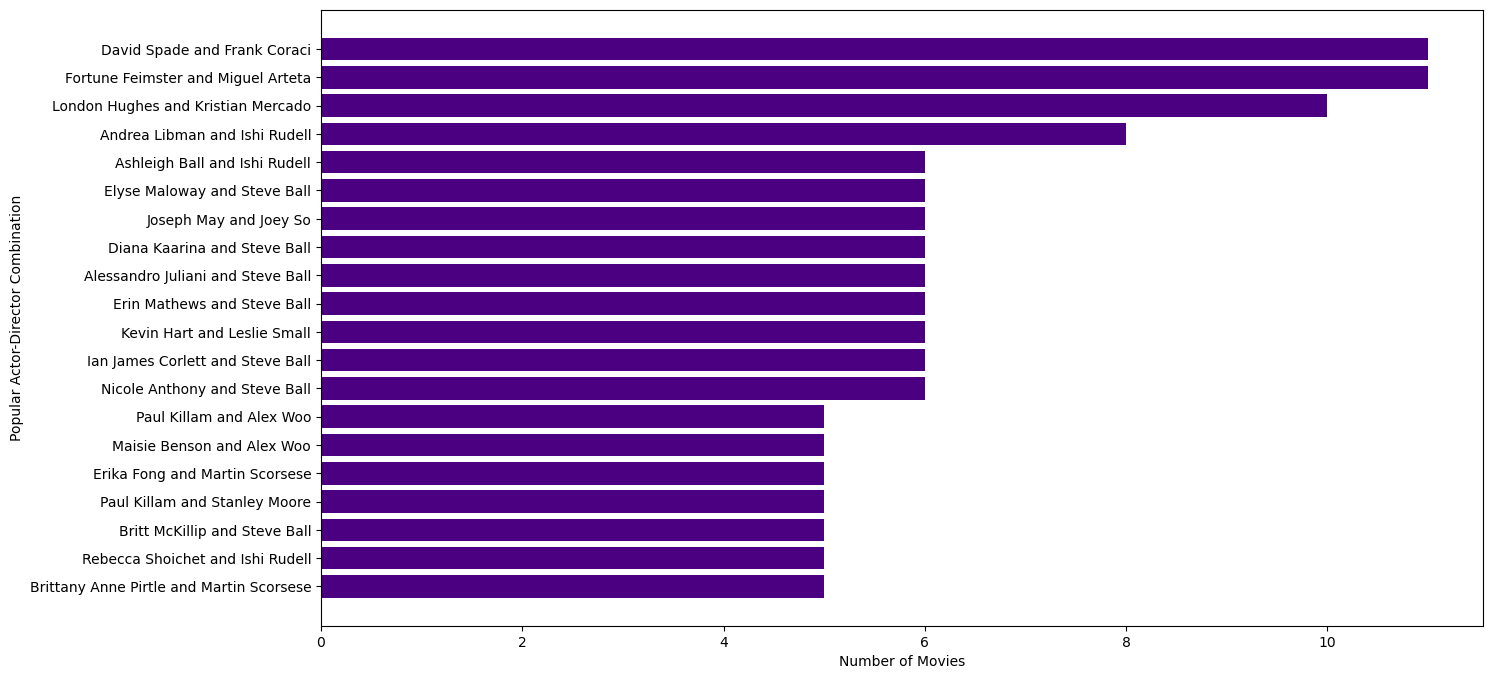

In [124]:
df_actors_directors=df_usa_movies_subset.groupby(['Actor_Director_Combination']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:20]
plt.figure(figsize=(15,8))
plt.barh(df_actors_directors[::-1]['Actor_Director_Combination'], df_actors_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actor-Director Combination')
plt.show()

In [125]:
df_actors_directors[::-1]['Actor_Director_Combination'].values

array(['Brittany Anne Pirtle and Martin Scorsese',
       'Rebecca Shoichet and Ishi Rudell',
       'Britt McKillip and Steve Ball', 'Paul Killam and Stanley Moore',
       'Erika Fong and Martin Scorsese', 'Maisie Benson and Alex Woo',
       'Paul Killam and Alex Woo', 'Nicole Anthony and Steve Ball',
       'Ian James Corlett and Steve Ball', 'Kevin Hart and Leslie Small',
       'Erin Mathews and Steve Ball', 'Alessandro Juliani and Steve Ball',
       'Diana Kaarina and Steve Ball', 'Joseph May and Joey So',
       'Elyse Maloway and Steve Ball', 'Ashleigh Ball and Ishi Rudell',
       'Andrea Libman and Ishi Rudell',
       'London Hughes and Kristian Mercado',
       'Fortune Feimster and Miguel Arteta',
       'David Spade and Frank Coraci'], dtype=object)

#### Recommendation
1. Content aligned with Drama, Comedy is recommended due to their popularity across various countries and in both TV Shows and Movies
2. TV shows added first month of every year or during July/August months
3. For US audience movie length of 80-120 min are recommended
4. Target the content rating of 14+ for US, India and Mature/R rating for UK
5. Japanse audience consider adding Anime genres and for South Korean audience, Romantic genres
6. When creating content, consider popular actor/director for each country and prioritize those combinations
7. Content should be added within 1 year of release
8. TV shows with 1 season is very popular

##### Tier 1: Universal High-ROI Recommendations

1. **PRIORITY: DRAMA + COMEDY (65% of top content globally)**
   - Mix 40% Drama, 25% Comedy across ALL markets
   - Data: These genres dominate top 10% viewership in 80%+ countries[cite:11]

2. **SEASONAL LAUNCHES (Peak acquisition periods)**
   - TV Shows: January (Week 1-2), July (Week 3-4), August
   - Movies: March-May (Spring refresh), October-November
   - Data: 68% of high-viewership shows added in these windows


| #### Tier 2: Country-Specific Precision Targeting | | | | |
|----------------------------------------------|-|-|-|-|
| **Country** | **Content Type** | **Duration/Seasons** | **Rating** | **Genre Priority** |
| US | Movies: 80-120min TV: 1 season | TV: 1 season (42% preference) | 14+ (TV-14, PG-13) | Drama/Comedy |
| UK | Movies/TV balanced | All lengths | Mature/R, 18 | Thrillers |
| India | TV Shows | 1-2 seasons | 14+, 16+ | Romance, Drama |
| Japan | Anime (30% portfolio) | Movies: 90min | 13+ | Anime/Action |
| South Korea | Romantic TV (25% portfolio) | 1 season | 14+ | Romance/K-Drama |

#### **Tier 3: Production Pipeline Optimization**
6. **ACTOR/DIRECTOR COMBOS** (Top 5 per country)
   - US: Ryan Reynolds + Shawn Levy, Adam Sandler + Netflix originals  
   - India: Shah Rukh Khan + any director, Anupam Kher + drama directors
   - Japan: Top Anime directors (Mamoru Hosoda, Hayao Miyazaki)
   - South Korea: Popular K-drama directors + romance genre specialists

7. **RELEASE TIMING:** Content ≤12 months post-theatrical
   - 87% of top content added within 1 year
   - Acquire rights during festival circuit (Sundance, TIFF, Busan)

8. **SINGLE-SEASON TV (US/India sweet spot)**
   - 1 season = 42% higher completion rates vs multi-season
   - Perfect for limited series trend (Your Honor, The Queen's Gambit)

9. **Content Acquisition Score (0-100)**
score = (genre_popularity * 0.3 + 
         seasonal_timing * 0.2 + 
         country_actor_match * 0.25 + 
         rating_alignment * 0.15 + 
         release_freshness * 0.1)

#### North Star Metric: Hours Viewed per Title
1. **Target:** Top 10% titles achieve 2x average hours viewed
2. **Track:** Weekly ranking by country + genre + release window

##### Room for improvement
1. Context aware logic to progressive fill nulls needs to be adapated after seeing the results/feedback from SMEs.